In [ ]:
import sys
import os
import glob
import importlib
#
import numpy as np
import pylab as plt
import matplotlib
import math as m
from matplotlib import rc
from scipy.signal import coherence
from scipy.stats import circmean


plt.close()

    # Define
primes = np.asarray([2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31])# max =37
foIX = primes*2
primesE = np.asarray([2,5,11,17,23,31])#primes[::2]
primesO = np.asarray([3,7,13,19,29])#primes[1::2]
foIXE = primesE*2
foIXO = primesO*2
freq = np.linspace(0,599.5,1200)#refs.shape[0]/2)
tempfreq = np.ones((2400,))
TEMPFREQ = np.fft.fft(tempfreq)[0]
foM = 1/(1j*(2*m.pi*freq[foIX]))*20
foM = np.asarray(foM)

# Define
primes = np.asarray([2, 3, 5, 7, 11, 13,17])# max =37
soIX = primes*2
primesE = np.asarray([2,5,11,17])#primes[::2]
primesO = np.asarray([3,7,13])#primes[1::2]
soIXE = primesE*2
soIXO = primesO*2
s = 1.0j*2*m.pi*freq[soIX]/20
soM = 1.0/(np.multiply(s,s)+s)#(1.0/(-(2*m.pi*freq[IX])**2+1j*(2*m.pi*freq[IX])))*20
soM = np.asarray(soM)

#
def findFFT(listofIDs,IX):
    trials = dict()
    for id in listofIDs:
      fis = sorted(glob.glob(os.path.join('data',subject,'*_'+protocol+'_'+id+'.npz')))
      if len(fis) > 1:
        dbg('WARNING -- repeated trials for id ='+id)
      assert len(fis) > 0, 'ERROR -- no data for id ='+id
      fi = fis[-1]
      print('LOAD '+fi)
      trial = dict(np.load(fi, allow_pickle=True))
      trials[id] = trial

    timedomainvalues = {}
    timedomainvalues[listofIDs[0]] = {}
    times_ = [trials[listofIDs[0]]['time_']]
    refs_  = [trials[listofIDs[0]]['ref_']]
    outs_  = [trials[listofIDs[0]]['out_']]
    inps_  = [trials[listofIDs[0]]['inp_']]#/(scales[0]*3.)] # what's the scale for?
    dists_ = [trials[listofIDs[0]]['dis_']]


    timedomainvalues[listofIDs[0]]['times'] = np.hstack(times_)[-2400:] # take out first 5 sec
    timedomainvalues[listofIDs[0]]['refs'] = np.hstack(refs_)[-2400:]
    timedomainvalues[listofIDs[0]]['outs'] = np.hstack(outs_)[-2400:]
    timedomainvalues[listofIDs[0]]['inps'] = np.hstack(inps_)[-2400:]
    timedomainvalues[listofIDs[0]]['dists'] = np.hstack(dists_)[-2400:]

    for id in listofIDs[1:]:
      times_ = [trials[id]['time_']]
      refs_  = [trials[id]['ref_']]
      outs_  = [trials[id]['out_']]
      inps_  = [trials[id]['inp_']]
      dists_ = [trials[id]['dis_']]
      timedomainvalues[id] = {}
      timedomainvalues[id]['times'] = (np.hstack(times_)[-2400:]) # take out first 5 sec
      timedomainvalues[id]['refs']=(np.hstack(refs_)[-2400:])
      timedomainvalues[id]['outs']=(np.hstack(outs_)[-2400:])
      timedomainvalues[id]['inps']=(np.hstack(inps_)[-2400:])
      timedomainvalues[id]['dists']=(np.hstack(dists_)[-2400:])


    FREQDOMAINVALUES = {}
    for id in listofIDs:
        FREQDOMAINVALUES[id] = {}
        FREQDOMAINVALUES[id]['OUTS'] = np.fft.fft(timedomainvalues[id]['outs'])[:timedomainvalues[id]['outs'].shape[0]/2]/TEMPFREQ
        FREQDOMAINVALUES[id]['INPS'] = np.fft.fft(timedomainvalues[id]['inps'])[:timedomainvalues[id]['inps'].shape[0]/2]/TEMPFREQ
        FREQDOMAINVALUES[id]['REFS'] = np.fft.fft(timedomainvalues[id]['refs'])[:timedomainvalues[id]['refs'].shape[0]/2]/TEMPFREQ
        FREQDOMAINVALUES[id]['DISTS'] = np.fft.fft(timedomainvalues[id]['dists'])[:timedomainvalues[id]['dists'].shape[0]/2]/TEMPFREQ
        FREQDOMAINVALUES[id]['Hru'] = np.divide(FREQDOMAINVALUES[id]['INPS'][IX],FREQDOMAINVALUES[id]['REFS'][IX])
        FREQDOMAINVALUES[id]['Hdu'] = np.divide(FREQDOMAINVALUES[id]['INPS'][IX],FREQDOMAINVALUES[id]['DISTS'][IX])
    return timedomainvalues, FREQDOMAINVALUES

def plotThings(M,Rid,Did,Bothid,Evenid,Oddid,IX,IXE,IXO):
    # find ffts
    ref, REF = findFFT(Rid,IX)
    dis,DIS = findFFT(Did,IX)
    both,BOTH = findFFT(Bothid,IX)

    # making figures
    # plot Hdu, Hru for all trials
    # plt.figure()
    # # plot Hru
    # plt.subplot(241)
    # linecolor = 0.2
    # for id in Rid:
    #     plt.loglog(freq[IX],np.absolute(REF[id]['Hru']),color='%f'%linecolor)
    #     linecolor += .08
    # plt.ylabel('Magnitude')
    # plt.title('Hru - ref only')
    #
    # plt.subplot(245)
    # linecolor = 0.2
    # for id in Rid:
    #     plt.semilogx(freq[IX],np.angle(REF[id]['Hru'])*180/m.pi,color='%f'%linecolor)
    #     linecolor += .08
    # plt.ylabel('Phase - deg')
    # plt.xlabel('Frequency - Hz')
    #
    # # plot Hdu
    # plt.subplot(242)
    # linecolor = 0.2
    # for id in Did:
    #     plt.loglog(freq[IX],np.absolute(DIS[id]['Hdu']),color='%f'%linecolor)
    #     linecolor += .08
    # plt.ylabel('Magnitude')
    # plt.title('Hdu - dis only')
    #
    # plt.subplot(246)
    # linecolor = 0.2
    # for id in Did:
    #     plt.semilogx(freq[IX],np.angle(DIS[id]['Hdu'])*180/m.pi,color='%f'%linecolor)
    #     linecolor += .08
    # plt.ylabel('Phase - deg')
    # plt.xlabel('Frequency - Hz')
    #
    # # plot BOTH
    # plt.subplot(243)
    # linecolor=.2
    # for id in Evenid:
    #     plt.loglog(freq[IXE],np.absolute(BOTH[id]['Hru'][0::2]),color='%f'%linecolor)
    #     linecolor+=.08
    # for id in Oddid:
    #     plt.loglog(freq[IXO],np.absolute(BOTH[id]['Hru'][1::2]))
    # plt.ylabel('Magnitude')
    # plt.title('Hru - BOTH')
    #
    # plt.subplot(247)
    # linecolor=.2
    # for id in Evenid:
    #     plt.semilogx(freq[IXE],np.angle(BOTH[id]['Hru'][0::2])*180/m.pi,color='%f'%linecolor)
    #     linecolor+=.08
    # for id in Oddid:
    #     plt.semilogx(freq[IXO],np.angle(BOTH[id]['Hru'][1::2])*180/m.pi)
    # plt.ylabel('Phase - deg')
    # plt.xlabel('Frequency - Hz')
    #
    # # plot Hdu
    # plt.subplot(244)
    # linecolor=.2
    # for id in Evenid:
    #     plt.loglog(freq[IXO],np.absolute(BOTH[id]['Hdu'][1::2]))
    # for id in Oddid:
    #     plt.loglog(freq[IXE],np.absolute(BOTH[id]['Hdu'][0::2]),color='%f'%linecolor)
    #     linecolor+=.08
    # plt.ylabel('Magnitude')
    # plt.title('Hdu - both')
    #
    # plt.subplot(248)
    # linecolor=.2
    # for id in Evenid:
    #     plt.semilogx(freq[IXO],np.angle(BOTH[id]['Hdu'][1::2])*180/m.pi)
    # for id in Oddid:
    #     plt.semilogx(freq[IXE],np.angle(BOTH[id]['Hdu'][0::2])*180/m.pi,color='%f'%linecolor)
    #     linecolor+=.08
    # plt.ylabel('Phase - deg')
    # plt.xlabel('Frequency - Hz')



    # now find averages for Hru and Hdu for R AND D SOLO
    HruRavg = np.zeros((len(IX),))
    for id in Rid:
        HruRavg = HruRavg+REF[id].get('Hru')
    HruRavg = HruRavg/len(REF)

    HduDavg = np.zeros((len(IX),))
    for id in Did:
        HduDavg = HduDavg+DIS[id].get('Hdu')
    HduDavg = HduDavg/len(DIS)

    # and get averages for FOB and FOF
    BD = np.divide(-HduDavg,(np.multiply(M,(1.0+0j)+HduDavg)))
    FR = np.multiply(HruRavg,(1.0+0j)+np.multiply(BD,M))-BD
    
    BonlyR = np.divide(HruRavg,(1.0+0j)-np.multiply(HruRavg,M))
    BonlyD = np.divide(-HduDavg,(np.multiply(M,(1.0+0j)+HduDavg)))
    # plt.figure()
    # plt.subplot(221)
    # num = len(Rid)
    # plt.title('Estimated Feedback/Feedforward Policies from R, D trials (n=%i)'%num)
    # plt.loglog(freq[IX],np.absolute(BD),'b',label='Feedback')
    # plt.loglog(freq[IX],np.absolute(FR),'r',label='Feedforward')
    # plt.loglog(freq[IX],np.absolute(np.divide(1,M)),'r--',label='Model Inverse Prediction')
    # plt.legend()
    # plt.ylabel('Gain')
    #
    # plt.subplot(223)
    # plt.semilogx(freq[IX],np.angle(BD)*180/m.pi,'b',label='Feedback')
    # plt.semilogx(freq[IX],np.angle(FR)*180/m.pi,'r',label='Feedforward')
    # plt.semilogx(freq[IX],np.angle(np.divide(1,M))*180/m.pi,'r--',label='Model Inverse Prediction')
    # plt.legend()
    # plt.ylabel('Phase - deg')
    # plt.xlabel('Freq - Hz')

    # get averages for BOTH
    # this is for Hru
    tempE = np.zeros((len(IXE),))
    for id in Evenid:
        tempE = tempE +BOTH[id].get('Hru')[0::2]
    tempE = tempE/len(Evenid)

    tempO = np.zeros((len(IXO),))
    for id in Oddid:
        tempO = tempO +BOTH[id].get('Hru')[1::2]
    tempO = tempO/len(Oddid)

    HruRDavg = np.zeros((len(IX),),dtype=complex)
    HruRDavg[::2] = tempE
    HruRDavg[1::2] = tempO

    # this is for Hdu
    tempO = np.zeros((len(IXO),))
    for id in Evenid:
        tempO = tempO +BOTH[id].get('Hdu')[1::2]
    tempO = tempO/len(Evenid)

    tempE = np.zeros((len(IXE),))
    for id in Oddid:
        tempE = tempE +BOTH[id].get('Hdu')[::2]
    tempE = tempE/len(Oddid)

    HduRDavg = np.zeros((len(IX),),dtype=complex)
    HduRDavg[1::2] = tempO
    HduRDavg[::2] = tempE

    # find F and B
    BRD = np.divide(-HduRDavg,(np.multiply(M,(1.0+0j)+HduRDavg)))
    FRD = np.multiply(HruRDavg,(1.0+0j)+np.multiply(BRD,M))-BRD

    # plt.subplot(222)
    # num = len(Oddid)
    # plt.title('Estimated Feedback/Feedforward Policies from R+D trials (n=%i)'%num)
    # plt.loglog(freq[IX],np.absolute(BRD),'b',label='Feedback')
    # plt.loglog(freq[IX],np.absolute(FRD),'r',label='Feedforward')
    # plt.loglog(freq[IX],np.absolute(np.divide(1.0,M)),'r--',label='Model Inverse Prediction')
    # plt.legend()
    # plt.ylabel('Gain')
    #
    # plt.subplot(224)
    # plt.semilogx(freq[IX],np.angle(BRD)*180/m.pi,'b',label='Feedback')
    # plt.semilogx(freq[IX],np.angle(FRD)*180/m.pi,'r',label='Feedforward')
    # plt.semilogx(freq[IX],np.angle(np.divide(1.0,M))*180/m.pi,'r--',label='Model Inverse Prediction')
    # plt.legend()
    # plt.ylabel('Phase - deg')
    # plt.xlabel('Freq - Hz')
    return BD,FR,BRD,FRD,dis,DIS,ref,REF,both,BOTH,HruRavg,HduDavg,HruRDavg,HduRDavg,BonlyD,BonlyR



help = """
usage:
  analysis subject protocol [formats]

add filename formats to save files in those formats:
  visualization subject protocol png,mp4
"""

def dbg(s):
  print(s)
# CHECK THAT ALL RELEVANT PARAMETERS ARE SPECIFIED IN COMMAND
args = sys.argv
# if len(args) < 2:
#   dbg('\nABORT -- no subject specified')
#   dbg(help)
#   sys.exit(0)
# if len(args) < 3:
#   dbg('\nABORT -- no protocol specified')
#   dbg(help)
#   sys.exit(0)
# subject = args[1]
# protocol = args[2]
# fmts = []
# if len(args) >= 4:
#   fmts = args[3].split(',')
#

# importing protocol (su17v3)
protocol = 'su17v3'
proto = importlib.import_module('protocols.'+protocol)

def takeAverage(subjects):
    # find files for specific subject
    global subject
    subject = subjects
    fis = glob.glob(os.path.join('data',subject,'*_'+protocol+'*'))
    ids = sorted(list(set([fi.strip('.npz').split('_',2)[2] for fi in fis])))
    ids = [id for id in ids if ('.csv') not in id[-4:]]
    ids = [id for id in ids if id[-3:] not in ['rej','oob','rst','max','st1','st2']]
    foids = [id for id in ids if ('fo') in id]
    soids = [id for id in ids if ('fo') not in id]
    foRid = [id for id in foids if ('d-zer') in id]
    soRid = [id for id in soids if ('d-zer') in id]
    foDid = [id for id in foids if ('r-zer') in id]
    soDid = [id for id in soids if ('r-zer') in id]
    foBothid = [id for id in foids if ('zer') not in id]
    foEvenid = [id for id in foBothid if ('r-sos+E') in id or ('r-sos-E') in id]
    foOddid = [id for id in foBothid if ('r-sos-O') in id or ('r-sos+O') in id]
    soBothid = [id for id in soids if ('zer') not in id]
    soEvenid = [id for id in soBothid if ('r-sos+E') in id or ('r-sos-E') in id]
    soOddid = [id for id in soBothid if ('r-sos-O') in id or ('r-sos+O') in id]


    # first order
    BD,FR,BRD,FRD,dis,DIS,ref,REF,both,BOTH,HruRavg,HduDavg,HruRDavg,HduRDavg,BonlyD,BonlyR = plotThings(foM,foRid,foDid,foBothid,foEvenid,foOddid,foIX,foIXE,foIXO)

    # second order

    #BD,FR,BRD,FRD = plotThings(soM,soRid,soDid,soBothid,soEvenid,soOddid,soIX,soIXE,soIXO)
    return BD,FR,BRD,FRD,dis,DIS,ref,REF,both,BOTH,HruRavg,HduDavg,HruRDavg,HduRDavg,BonlyD,BonlyR


In [7]:
subjects = np.asarray(['ef','dp','gy','iz','ly','wv','zu'])
print(subjects.shape)

data = {}
dataAvg = {}
dataAvg['BDavg'] = np.zeros((11,len(subjects)))
dataAvg['FRavg'] = np.zeros((11,len(subjects)))
dataAvg['BRDavg'] =np.zeros((11,len(subjects)))
dataAvg['FRDavg'] =np.zeros((11,len(subjects)))

angleAvg = {}
angleAvg['BDavg'] = np.zeros((11,len(subjects)))
angleAvg['FRavg'] =np.zeros((11,len(subjects)))
angleAvg['BRDavg'] =np.zeros((11,len(subjects)))
angleAvg['FRDavg'] = np.zeros((11,len(subjects)))
numcount = 0;
for sub in subjects:
    data[sub] = {}
    data[sub]['BD'],data[sub]['FR'],data[sub]['BRD'],\
        data[sub]['FRD'],data[sub]['dis'],data[sub]['DIS'],data[sub]['ref'],\
        data[sub]['REF'],data[sub]['both'],data[sub]['BOTH'],data[sub]['HruRavg'],\
        data[sub]['HduDavg'],data[sub]['HruRDavg'],data[sub]['HduRDavg'],data[sub]['BonlyD'],\
        data[sub]['BonlyR'] = takeAverage(sub)
    data[sub]['BDabs'] = np.absolute(data[sub]['BD'])
    data[sub]['FRabs'] = np.absolute(data[sub]['FR'])
    data[sub]['BRDabs'] = np.absolute(data[sub]['BRD'])
    data[sub]['FRDabs'] = np.absolute(data[sub]['FRD'])

    data[sub]['BDangle'] = np.angle(data[sub]['BD'])
    data[sub]['FRangle'] = np.angle(data[sub]['FR'])
    data[sub]['BRDangle'] = np.angle(data[sub]['BRD'])
    data[sub]['FRDangle'] = np.angle(data[sub]['FRD'])

    dataAvg['BDavg'][:,numcount]=data[sub]['BDabs']
    dataAvg['FRavg'][:,numcount]=data[sub]['FRabs']
    dataAvg['BRDavg'][:,numcount]=data[sub]['BRDabs']
    dataAvg['FRDavg'][:,numcount]=data[sub]['FRDabs']

    angleAvg['BDavg'][:,numcount]=np.angle(data[sub]['BD'])
    angleAvg['FRavg'][:,numcount]=np.angle(data[sub]['FR'])
    angleAvg['BRDavg'][:,numcount]=np.angle(data[sub]['BRD'])
    angleAvg['FRDavg'][:,numcount]=np.angle(data[sub]['FRD'])
    numcount +=1

(7,)
LOAD data/ef/20170818-143610_su17v3_fo_r-sos+A_d-zer_s49_p0a3_+1.npz


UnicodeError: Unpickling a python object failed: UnicodeDecodeError('ascii', b'F<\xd7+\xe5\x8d\xd0>', 2, 3, 'ordinal not in range(128)')
You may need to pass the encoding= option to numpy.load

In [3]:
#find IQR for magnitude
dataAvg['BDq75'],dataAvg['BDq50'],dataAvg['BDq25'] = np.percentile(dataAvg['BDavg'],[75,50,25],axis=1)
dataAvg['FRq75'],dataAvg['FRq50'],dataAvg['FRq25'] = np.percentile(dataAvg['FRavg'],[75,50,25],axis=1)
dataAvg['BRDq75'],dataAvg['BRDq50'],dataAvg['BRDq25'] = np.percentile(dataAvg['BRDavg'],[75,50,25],axis=1)
dataAvg['FRDq75'],dataAvg['FRDq50'],dataAvg['FRDq25'] = np.percentile(dataAvg['FRDavg'],[75,50,25],axis=1)

# # find mean and std for angle

polar2z = lambda thetatemp: 1 * np.exp( 1j * thetatemp )
# get the mean unit vector of each angle 
angleAvg['BDunitmean'] = np.mean(polar2z(angleAvg['BDavg']),axis=1)
angleAvg['FRunitmean'] = np.mean(polar2z(angleAvg['FRavg']),axis=1)
angleAvg['BRDunitmean'] = np.mean(polar2z(angleAvg['BRDavg']),axis=1)
angleAvg['FRDunitmean'] = np.mean(polar2z(angleAvg['FRDavg']),axis=1)

# center each complex number about the mean (also a complex number)
angleAvg['BDmean'] = np.divide(polar2z(angleAvg['BDavg']),np.tile(angleAvg['BDunitmean'], (7,1)).T)
angleAvg['FRmean'] = np.divide(polar2z(angleAvg['FRavg']),np.tile(angleAvg['FRunitmean'], (7,1)).T)
angleAvg['BRDmean'] = np.divide(polar2z(angleAvg['BRDavg']),np.tile(angleAvg['BRDunitmean'], (7,1)).T)
angleAvg['FRDmean'] = np.divide(polar2z(angleAvg['FRDavg']),np.tile(angleAvg['FRDunitmean'], (7,1)).T)

# now take the angle of the complex number centered around mean
angleAvg['BDcenteredang'] = np.angle(angleAvg['BDmean'])
angleAvg['FRcenteredang'] = np.angle(angleAvg['FRmean'])
angleAvg['BRDcenteredang'] = np.angle(angleAvg['BRDmean'])
angleAvg['FRDcenteredang'] = np.angle(angleAvg['FRDmean'])

# get average angle angle
angleAvg['BDq75'],angleAvg['BDq50'],angleAvg['BDq25'] = np.percentile(angleAvg['BDcenteredang'],[75,50,25],axis=1)
angleAvg['FRq75'],angleAvg['FRq50'],angleAvg['FRq25'] = np.percentile(angleAvg['FRcenteredang'],[75,50,25],axis=1)
angleAvg['BRDq75'],angleAvg['BRDq50'],angleAvg['BRDq25'] = np.percentile(angleAvg['BRDcenteredang'],[75,50,25],axis=1)
angleAvg['FRDq75'],angleAvg['FRDq50'],angleAvg['FRDq25'] = np.percentile(angleAvg['FRDcenteredang'],[75,50,25],axis=1)

# now I need to add back in the mean
angleAvg['BDq75'] = angleAvg['BDq75']+np.angle(angleAvg['BDunitmean'])
angleAvg['BDq50']= angleAvg['BDq50']+np.angle(angleAvg['BDunitmean'])
angleAvg['BDq25']= angleAvg['BDq25']+np.angle(angleAvg['BDunitmean'])

angleAvg['FRq75'] = angleAvg['FRq75']+np.angle(angleAvg['FRunitmean'])
angleAvg['FRq50']= angleAvg['FRq50']+np.angle(angleAvg['FRunitmean'])
angleAvg['FRq25']= angleAvg['FRq25']+np.angle(angleAvg['FRunitmean'])

angleAvg['BRDq75'] = angleAvg['BRDq75']+np.angle(angleAvg['BRDunitmean'])
angleAvg['BRDq50']= angleAvg['BRDq50']+np.angle(angleAvg['BRDunitmean'])
angleAvg['BRDq25']= angleAvg['BRDq25']+np.angle(angleAvg['BRDunitmean'])

angleAvg['FRDq75'] = angleAvg['FRDq75']+np.angle(angleAvg['FRDunitmean'])
angleAvg['FRDq50']= angleAvg['FRDq50']+np.angle(angleAvg['FRDunitmean'])
angleAvg['FRDq25']= angleAvg['FRDq25']+np.angle(angleAvg['FRDunitmean'])

# angleAvg['BDReal']=np.cos(angleAvg['BDavg'])
# angleAvg['BDImag']=np.sin(angleAvg['BDavg'])

# angleAvg['FRReal']=np.cos(angleAvg['FRavg'])
# angleAvg['FRImag']=np.sin(angleAvg['FRavg'])

# angleAvg['BRDReal']=np.cos(angleAvg['BRDavg'])
# angleAvg['BRDImag']=np.sin(angleAvg['BRDavg'])

# angleAvg['FRDReal']=np.cos(angleAvg['FRDavg'])
# angleAvg['FRDImag']=np.sin(angleAvg['FRDavg'])


# angleAvg['BDRealq75'],angleAvg['BDRealq50'],angleAvg['BDRealq25'] = np.percentile(angleAvg['BDReal'],[75,50,25],axis=1)
# angleAvg['FRRealq75'],angleAvg['FRRealq50'],angleAvg['FRRealq25'] = np.percentile(angleAvg['FRReal'],[75,50,25],axis=1)
# angleAvg['BRDRealq75'],angleAvg['BRDRealq50'],angleAvg['BRDRealq25'] = np.percentile(angleAvg['BRDReal'],[75,50,25],axis=1)
# angleAvg['FRDRealq75'],angleAvg['FRDRealq50'],angleAvg['FRDRealq25'] = np.percentile(angleAvg['FRDReal'],[75,50,25],axis=1)

# angleAvg['BDImagq75'],angleAvg['BDImagq50'],angleAvg['BDImagq25'] = np.percentile(angleAvg['BDImag'],[75,50,25],axis=1)
# angleAvg['FRImagq75'],angleAvg['FRImagq50'],angleAvg['FRImagq25'] = np.percentile(angleAvg['FRImag'],[75,50,25],axis=1)
# angleAvg['BRDImagq75'],angleAvg['BRDImagq50'],angleAvg['BRDImagq25'] = np.percentile(angleAvg['BRDImag'],[75,50,25],axis=1)
# angleAvg['FRDImagq75'],angleAvg['FRDImagq50'],angleAvg['FRDImagq25'] = np.percentile(angleAvg['FRDImag'],[75,50,25],axis=1)

# angleAvg['BDq75'] = np.angle(angleAvg['BDRealq75']+1j*angleAvg['BDImagq75'])
# angleAvg['FRq75'] = np.angle(angleAvg['FRRealq75']+1j*angleAvg['FRImagq75'])
# angleAvg['BRDq75'] = np.angle(angleAvg['BRDRealq75']+1j*angleAvg['BRDImagq75'])
# angleAvg['FRDq75'] = np.angle(angleAvg['FRDRealq75']+1j*angleAvg['FRDImagq75'])

# angleAvg['BDq25'] = np.angle(angleAvg['BDRealq25']+1j*angleAvg['BDImagq25'])
# angleAvg['FRq25'] = np.angle(angleAvg['FRRealq25']+1j*angleAvg['FRImagq25'])
# angleAvg['BRDq25'] = np.angle(angleAvg['BRDRealq25']+1j*angleAvg['BRDImagq25'])
# angleAvg['FRDq25'] = np.angle(angleAvg['FRDRealq25']+1j*angleAvg['FRDImagq25'])

# angleAvg['BDq50'] = np.angle(angleAvg['BDRealq50']+1j*angleAvg['BDImagq50'])
# angleAvg['FRq50'] = np.angle(angleAvg['FRRealq50']+1j*angleAvg['FRImagq50'])
# angleAvg['BRDq50'] = np.angle(angleAvg['BRDRealq50']+1j*angleAvg['BRDImagq50'])
# angleAvg['FRDq50'] = np.angle(angleAvg['FRDRealq50']+1j*angleAvg['FRDImagq50'])

# angleAvg['BDq75'],angleAvg['BDq50'],angleAvg['BDq25'] = np.percentile(angleAvg['BDavg'],[75,50,25],axis=1)
# angleAvg['FRq75'],angleAvg['FRq50'],angleAvg['FRq25'] = np.percentile(angleAvg['FRavg'],[75,50,25],axis=1)
# angleAvg['BRDq75'],angleAvg['BRDq50'],angleAvg['BRDq25'] = np.percentile(angleAvg['BRDavg'],[75,50,25],axis=1)
# angleAvg['FRDq75'],angleAvg['FRDq50'],angleAvg['FRDq25'] = np.percentile(angleAvg['FRDavg'],[75,50,25],axis=1)

In [4]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

matplotlib.rc('font', **font)

In [5]:
# plot for the trials
sub = subjects[0]
print 'REF'
print data[sub]['REF'].keys()
print 'DIS'
print data[sub]['DIS'].keys()
print 'BOTH'
print data[sub]['BOTH'].keys()

REF
['fo_r-sos+A_d-zer_s49_p0a3_+1', 'fo_r-sos+A_d-zer_s49_p4a3_-1', 'fo_r-sos+A_d-zer_s49_p1a3_+1', 'fo_r-sos+A_d-zer_s49_p4a3_+1', 'fo_r-sos+A_d-zer_s49_p3a3_+1', 'fo_r-sos+A_d-zer_s49_p2a3_+1', 'fo_r-sos+A_d-zer_s49_p2a3_-1', 'fo_r-sos+A_d-zer_s49_p0a3_-1', 'fo_r-sos+A_d-zer_s49_p1a3_-1', 'fo_r-sos+A_d-zer_s49_p3a3_-1']
DIS
['fo_r-zer_d-sos+A_s49_p3a1_+1', 'fo_r-zer_d-sos+A_s49_p0a1_-1', 'fo_r-zer_d-sos+A_s49_p1a1_+1', 'fo_r-zer_d-sos+A_s49_p4a1_+1', 'fo_r-zer_d-sos+A_s49_p2a1_-1', 'fo_r-zer_d-sos+A_s49_p1a1_-1', 'fo_r-zer_d-sos+A_s49_p2a1_+1', 'fo_r-zer_d-sos+A_s49_p3a1_-1', 'fo_r-zer_d-sos+A_s49_p4a1_-1', 'fo_r-zer_d-sos+A_s49_p0a1_+1']
BOTH
['fo_r-sos-E_d-sos+O_s49_p0a4_+1', 'fo_r-sos+E_d-sos+O_s49_p0a6_-1', 'fo_r-sos+O_d-sos+E_s49_p0a2_-1', 'fo_r-sos-O_d-sos+E_s49_p0a5_-1', 'fo_r-sos+O_d-sos+E_s49_p0a2_+1', 'fo_r-sos+E_d-sos+O_s49_p0a0_+1', 'fo_r-sos+E_d-sos+O_s49_p0a6_+1', 'fo_r-sos-E_d-sos+O_s49_p0a4_-1', 'fo_r-sos+E_d-sos+O_s49_p0a0_-1', 'fo_r-sos-O_d-sos+E_s49_p0a5_+1']


In [6]:
sub = subjects[0]
print data[sub]['both']['fo_r-sos-E_d-sos+O_s49_p0a4_+1'].keys()

plt.figure(figsize=(10,5))
ax = plt.subplot(111)
timedomaindata = data[sub]['both']['fo_r-sos-E_d-sos+O_s49_p0a4_+1']
plt.plot(timedomaindata['times'],timedomaindata['refs'],color='r:',label='Reference')
plt.plot(timedomaindata['times'],(timedomaindata['dists']),color='blue-',label='Disturbance')
plt.xlabel('Time (sec)')
plt.ylabel('Position')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#plt.legend()

plt.figure(figsize=(10,5))
freqdata = data[sub]['BOTH']['fo_r-sos-E_d-sos+O_s49_p0a4_+1']
ax = plt.subplot(111)
# plt.scatter(freq/20.0-.001,abs(freqdata['REFS']),color='gold')
# plt.scatter(freq/20.0,abs(freqdata['DISTS']),color='blue')
# plt.scatter(freq/20.0+.001,abs(freqdata['OUTS']),color='purple')

# plt.vlines(freq/20.0-.001,np.zeros(len(freq),),abs(freqdata['REFS']),color='gold',label='Reference')
# plt.vlines(freq/20.0,np.zeros(len(freq),),abs(freqdata['DISTS']),color='blue',label='Disturbance')
# plt.vlines(freq/20.0+.001,np.zeros(len(freq),),abs(freqdata['OUTS']),color='purple',label='User output')
# plt.xlabel('Frequency (Hz)')
# plt.xlim((1.5/20,31.0/20))

plt.scatter(freq/20.0,abs(freqdata['REFS']),color='r:',label='Reference')
plt.scatter(freq/20.0,abs(freqdata['DISTS']),color='blue-',label='Disturbance')
plt.vlines(freq/20.0,np.zeros((len(freq),)),abs(freqdata['REFS']),color='r')
plt.vlines(freq/20.0,np.zeros((len(freq),)),abs(freqdata['DISTS']),color='blue')

plt.ylabel('Magnitude')
ax.set_xscale("log", nonposy='clip')
#ax.set_yscale("log", nonposy='clip')

ax.set_xticks(foIX/2.0/20)
labels = ax.set_xticklabels((foIX/2.0/20))
for i, label in enumerate(labels):
    label.set_y(label.get_position()[1] - (i % 3) * 0.08)
plt.xlabel('Frequency (Hz)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(framealpha=1,ncol=3)
plt.xlim((1.5/20,31.0/20))

# with user output
plt.figure(figsize=(10,5))
ax = plt.subplot(111)
timedomaindata = data[sub]['both']['fo_r-sos-E_d-sos+O_s49_p0a4_+1']
plt.plot(timedomaindata['times'],timedomaindata['refs'],color='r',label='Reference')
plt.plot(timedomaindata['times'],(timedomaindata['dists']),color='blue',label='Disturbance')
plt.plot(timedomaindata['times'],timedomaindata['outs'],color='purple',label='Output')
plt.xlabel('Time (sec)')
plt.ylabel('Position')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#plt.legend()

plt.figure(figsize=(10,5))
freqdata = data[sub]['BOTH']['fo_r-sos-E_d-sos+O_s49_p0a4_+1']
ax = plt.subplot(111)

plt.scatter(freq/20.0,abs(freqdata['REFS']),color='r',label='Reference')
plt.scatter(freq/20.0,abs(freqdata['DISTS']),color='blue',label='Disturbance')
plt.vlines(freq/20.0,np.zeros((len(freq),)),abs(freqdata['REFS']),color='r')
plt.vlines(freq/20.0,np.zeros((len(freq),)),abs(freqdata['DISTS']),color='blue')
plt.scatter(freq/20.0,abs(freqdata['OUTS']),color='purple',label='Output')
plt.vlines(freq/20.0,np.zeros((len(freq),)),abs(freqdata['OUTS']),color='purple')

plt.ylabel('Magnitude')
ax.set_xscale("log", nonposy='clip')
#ax.set_yscale("log", nonposy='clip')

ax.set_xticks(foIX/2.0/20)
labels = ax.set_xticklabels((foIX/2.0/20))
for i, label in enumerate(labels):
    label.set_y(label.get_position()[1] - (i % 3) * 0.08)
plt.xlabel('Frequency (Hz)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(framealpha=1,ncol=3)
plt.xlim((1.5/20,31.0/20))

plt.show()

['refs', 'outs', 'inps', 'dists', 'times']


ValueError: 'color' kwarg must be an mpl color spec or sequence of color specs.
For a sequence of values to be color-mapped, use the 'c' kwarg instead.

C:\Users\BRL\Anaconda2\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family [u'normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


ValueError: Invalid RGBA argument: 'r:'

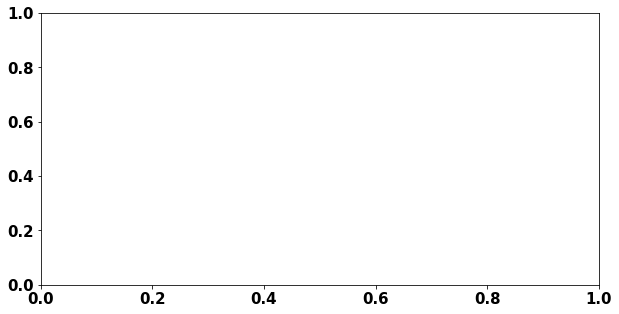

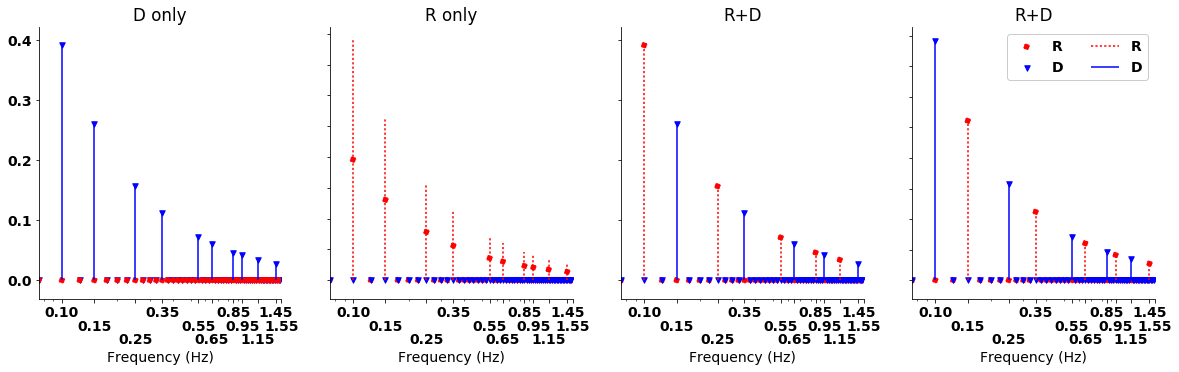

In [7]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

matplotlib.rc('font', **font)
from matplotlib.ticker import FormatStrFormatter
markersize=30

plt.figure(figsize=(20, 5))
ax = plt.subplot(141)
plt.title('D only')
refid = 'fo_r-sos+A_d-zer_s49_p3a3_-1'
disid = 'fo_r-zer_d-sos+A_s49_p3a1_+1'
bothEid = 'fo_r-sos-E_d-sos+O_s49_p0a4_+1'
bothOid = 'fo_r-sos+O_d-sos+E_s49_p0a2_-1'
plt.scatter(freq[:foIX[-1]]/20,abs(data[sub]['DIS'][disid]['DISTS'][:foIX[-1]])*2,
            color='b',linestyle='-',marker='v',s=markersize)#,yerr=np.asarray([dataAvg['BRDq25'],dataAvg['BRDq75']]),color=(.6,.6,1),label='Feedback')
plt.scatter(freq[:foIX[-1]]/20,abs(data[sub]['DIS'][disid]['REFS'][:foIX[-1]])*2,
            color='r',linestyle=':',marker='o',s=markersize)
plt.vlines(freq[:foIX[-1]]/20,np.zeros((len(freq[:foIX[-1]]),)),
           abs(data[sub]['DIS'][disid]['DISTS'][:foIX[-1]])*2,color='b',linestyle='-')#,yerr=np.asarray([dataAvg['BRDq25'],dataAvg['BRDq75']]),color=(.6,.6,1),label='Feedback')
plt.vlines(freq[:foIX[-1]]/20,np.zeros((len(freq[:foIX[-1]]),)),
           abs(data[sub]['DIS'][disid]['REFS'][:foIX[-1]])*2,color='r',linestyle=':')
ax.set_xscale("log", nonposy='clip')
ax.set_xticks(foIX/2.0/20)
labels = ax.set_xticklabels((foIX/2.0/20))
for i, label in enumerate(labels):
    label.set_y(label.get_position()[1] - (i % 3) * 0.05)
plt.xlabel('Frequency (Hz)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlim((1.5/20,31.0/20))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

ax=plt.subplot(142)
plt.scatter(freq[:foIX[-1]]/20,abs(data[sub]['REF'][refid]['REFS'][:foIX[-1]]),
            color='r',linestyle=':',marker='o',s=markersize)
plt.scatter(freq[:foIX[-1]]/20,abs(data[sub]['REF'][refid]['DISTS'][:foIX[-1]]),
            color='b',linestyle='-',marker='v',s=markersize)

plt.vlines(freq[:foIX[-1]]/20,np.zeros((len(freq[:foIX[-1]]),)),
           abs(data[sub]['REF'][refid]['REFS'][:foIX[-1]])*2,color='r',linestyle=':')
plt.vlines(freq[:foIX[-1]]/20,np.zeros((len(freq[:foIX[-1]]),)),
           abs(data[sub]['REF'][refid]['DISTS'][:foIX[-1]])*2,color='b',linestyle='-')
ax.set_xscale("log", nonposy='clip')
ax.axes.yaxis.set_ticklabels([])
ax.set_xticks(foIX/2.0/20)
labels = ax.set_xticklabels((foIX/2.0/20))
for i, label in enumerate(labels):
    label.set_y(label.get_position()[1] - (i % 3) * 0.05)
plt.title('R only')
plt.xlabel('Frequency (Hz)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlim((1.5/20,31.0/20))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))


ax=plt.subplot(143)
plt.scatter(freq[:foIX[-1]]/20.0,abs(data[sub]['BOTH'][bothEid]['REFS'][:foIX[-1]])*2,
            color='r',linestyle=':',marker='o',s=markersize)
plt.scatter(freq[:foIX[-1]]/20.0,abs(data[sub]['BOTH'][bothEid]['DISTS'][:foIX[-1]])*2,
            color='b',linestyle='-',marker='v',s=markersize)

plt.vlines(freq[:foIX[-1]]/20.0,np.zeros((len(freq[:foIX[-1]]),)),
           abs(data[sub]['BOTH'][bothEid]['REFS'][:foIX[-1]])*2,color='r',linestyle=':')
plt.vlines(freq[:foIX[-1]]/20.0,np.zeros((len(freq[:foIX[-1]]),)),
           abs(data[sub]['BOTH'][bothEid]['DISTS'][:foIX[-1]])*2,color='b',linestyle='-')
ax.set_xscale("log", nonposy='clip')
ax.axes.yaxis.set_ticklabels([])
ax.set_xticks(foIX/2.0/20)
labels = ax.set_xticklabels((foIX/2.0/20))
for i, label in enumerate(labels):
    label.set_y(label.get_position()[1] - (i % 3) * 0.05)
plt.title('R+D')
plt.xlabel('Frequency (Hz)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlim((1.5/20,31.0/20))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))


ax= plt.subplot(144)
plt.scatter(freq[:foIX[-1]]/20,abs(data[sub]['BOTH'][bothOid]['REFS'][:foIX[-1]])*2,
            color='r',label='R',linestyle=':',marker='o',s=markersize)
plt.scatter(freq[:foIX[-1]]/20,abs(data[sub]['BOTH'][bothOid]['DISTS'][:foIX[-1]])*2,
            color='b',label='D',linestyle='-',marker='v',s=markersize)

plt.vlines(freq[:foIX[-1]]/20,np.zeros((len(freq[:foIX[-1]]),)),
           abs(data[sub]['BOTH'][bothOid]['REFS'][:foIX[-1]])*2,color='r',label='R',linestyle=':')
plt.vlines(freq[:foIX[-1]]/20,np.zeros((len(freq[:foIX[-1]]),)),
           abs(data[sub]['BOTH'][bothOid]['DISTS'][:foIX[-1]])*2,color='b',label='D',linestyle='-')
ax.set_xscale("log", nonposy='clip')

ax.axes.yaxis.set_ticklabels([])
ax.set_xticks(foIX/2.0/20)
labels = ax.set_xticklabels((foIX/2.0/20))
for i, label in enumerate(labels):
    label.set_y(label.get_position()[1] - (i % 3) * 0.05)
plt.xlabel('Frequency (Hz)')
plt.title('R+D')
plt.xlim((1.5/20,31.0/20))
plt.legend(framealpha=1,ncol=2) # COMMENT OUT TO DELETE LEGEND
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))


#print(abs(data[sub]['DIS'][disid]['DISTS'][:foIX[-1]]))
plt.show()

now repeat everything for second order

In [ ]:
def takeAverageSO(subjects):
    # find files for specific subject
    global subject
    subject = subjects
    fis = glob.glob(os.path.join('data',subject,'*_'+protocol+'*'))
    ids = sorted(list(set([fi.strip('.npz').split('_',2)[2] for fi in fis])))
    ids = [id for id in ids if ('.csv') not in id[-4:]]
    ids = [id for id in ids if id[-3:] not in ['rej','oob','rst','max','st1','st2']]
    foids = [id for id in ids if ('fo') in id]
    soids = [id for id in ids if ('fo') not in id]
    foRid = [id for id in foids if ('d-zer') in id]
    soRid = [id for id in soids if ('d-zer') in id]
    foDid = [id for id in foids if ('r-zer') in id]
    soDid = [id for id in soids if ('r-zer') in id]
    foBothid = [id for id in foids if ('zer') not in id]
    foEvenid = [id for id in foBothid if ('r-sos+E') in id or ('r-sos-E') in id]
    foOddid = [id for id in foBothid if ('r-sos-O') in id or ('r-sos+O') in id]
    soBothid = [id for id in soids if ('zer') not in id]
    soEvenid = [id for id in soBothid if ('r-sos+E') in id or ('r-sos-E') in id]
    soOddid = [id for id in soBothid if ('r-sos-O') in id or ('r-sos+O') in id]

    # first order
    #BD,FR,BRD,FRD,dis,DIS,ref,REF,both,BOTH,HruRavg,HduDavg,HruRDavg,HduRDavg = plotThings(foM,foRid,foDid,foBothid,foEvenid,foOddid,foIX,foIXE,foIXO)

    # second order

    BD,FR,BRD,FRD,dis,DIS,ref,REF,both,BOTH,HruRavg,HduDavg,HruRDavg,HduRDavg,B,D = plotThings(soM,soRid,soDid,soBothid,soEvenid,soOddid,soIX,soIXE,soIXO)
    return BD,FR,BRD,FRD,dis,DIS,ref,REF,both,BOTH,HruRavg,HduDavg,HruRDavg,HduRDavg

dataSO = {}
dataAvgSO = {}
dataAvgSO['BDavg'] = np.zeros((len(soIX),len(subjects)))
dataAvgSO['FRavg'] = np.zeros((len(soIX),len(subjects)))
dataAvgSO['BRDavg'] =np.zeros((len(soIX),len(subjects)))
dataAvgSO['FRDavg'] =np.zeros((len(soIX),len(subjects)))

angleAvgSO = {}
angleAvgSO['BDavg'] = np.zeros((len(soIX),len(subjects)))
angleAvgSO['FRavg'] =np.zeros((len(soIX),len(subjects)))
angleAvgSO['BRDavg'] =np.zeros((len(soIX),len(subjects)))
angleAvgSO['FRDavg'] = np.zeros((len(soIX),len(subjects)))
numcount = 0;
for sub in subjects:
    dataSO[sub] = {}
    dataSO[sub]['BD'],dataSO[sub]['FR'],dataSO[sub]['BRD'],dataSO[sub]['FRD'],dataSO[sub]['dis'],\
        dataSO[sub]['DIS'],dataSO[sub]['ref'],dataSO[sub]['REF'],dataSO[sub]['both'],\
        dataSO[sub]['BOTH'],dataSO[sub]['HruRavg'],dataSO[sub]['HduDavg'],dataSO[sub]['HruRDavg'],\
        dataSO[sub]['HduRDavg']= takeAverageSO(sub)
    dataSO[sub]['BDabs'] = np.absolute(dataSO[sub]['BD'])
    dataSO[sub]['FRabs'] = np.absolute(dataSO[sub]['FR'])
    dataSO[sub]['BRDabs'] = np.absolute(dataSO[sub]['BRD'])
    dataSO[sub]['FRDabs'] = np.absolute(dataSO[sub]['FRD'])

    dataSO[sub]['BDangle'] = np.angle(dataSO[sub]['BD'])
    dataSO[sub]['FRangle'] = np.angle(dataSO[sub]['FR'])
    dataSO[sub]['BRDangle'] = np.angle(dataSO[sub]['BRD'])
    dataSO[sub]['FRDangle'] = np.angle(dataSO[sub]['FRD'])

    dataAvgSO['BDavg'][:,numcount]=dataSO[sub]['BDabs']
    dataAvgSO['FRavg'][:,numcount]=dataSO[sub]['FRabs']
    dataAvgSO['BRDavg'][:,numcount]=dataSO[sub]['BRDabs']
    dataAvgSO['FRDavg'][:,numcount]=dataSO[sub]['FRDabs']

    angleAvgSO['BDavg'][:,numcount]=np.angle(dataSO[sub]['BD'])
    angleAvgSO['FRavg'][:,numcount]=np.angle(dataSO[sub]['FR'])
    angleAvgSO['BRDavg'][:,numcount]=np.angle(dataSO[sub]['BRD'])
    angleAvgSO['FRDavg'][:,numcount]=np.angle(dataSO[sub]['FRD'])
    numcount +=1

LOAD data\ef\20170818-150510_su17v3_so_r-sos+A_d-zer_s49_p0a3_+1.npz
LOAD data\ef\20170818-150950_su17v3_so_r-sos+A_d-zer_s49_p0a3_-1.npz
LOAD data\ef\20170818-150420_su17v3_so_r-sos+A_d-zer_s49_p1a3_+1.npz
LOAD data\ef\20170818-150600_su17v3_so_r-sos+A_d-zer_s49_p1a3_-1.npz
LOAD data\ef\20170818-150334_su17v3_so_r-sos+A_d-zer_s49_p2a3_+1.npz
LOAD data\ef\20170818-150902_su17v3_so_r-sos+A_d-zer_s49_p2a3_-1.npz
LOAD data\ef\20170818-150158_su17v3_so_r-sos+A_d-zer_s49_p3a3_+1.npz
LOAD data\ef\20170818-150700_su17v3_so_r-sos+A_d-zer_s49_p3a3_-1.npz
LOAD data\ef\20170818-150245_su17v3_so_r-sos+A_d-zer_s49_p4a3_+1.npz
LOAD data\ef\20170818-150807_su17v3_so_r-sos+A_d-zer_s49_p4a3_-1.npz


C:\Users\BRL\Anaconda2\lib\site-packages\ipykernel_launcher.py:88: RuntimeWarning: divide by zero encountered in divide


LOAD data\ef\20170818-145257_su17v3_so_r-zer_d-sos+A_s49_p0a1_+1.npz
LOAD data\ef\20170818-145803_su17v3_so_r-zer_d-sos+A_s49_p0a1_-1.npz
LOAD data\ef\20170818-145027_su17v3_so_r-zer_d-sos+A_s49_p1a1_+1.npz
LOAD data\ef\20170818-145457_su17v3_so_r-zer_d-sos+A_s49_p1a1_-1.npz
LOAD data\ef\20170818-145118_su17v3_so_r-zer_d-sos+A_s49_p2a1_+1.npz
LOAD data\ef\20170818-145349_su17v3_so_r-zer_d-sos+A_s49_p2a1_-1.npz
LOAD data\ef\20170818-145208_su17v3_so_r-zer_d-sos+A_s49_p3a1_+1.npz
LOAD data\ef\20170818-145713_su17v3_so_r-zer_d-sos+A_s49_p3a1_-1.npz
LOAD data\ef\20170818-144937_su17v3_so_r-zer_d-sos+A_s49_p4a1_+1.npz
LOAD data\ef\20170818-145548_su17v3_so_r-zer_d-sos+A_s49_p4a1_-1.npz
LOAD data\ef\20170818-144756_su17v3_so_r-sos+E_d-sos+O_s49_p0a0_+1.npz


C:\Users\BRL\Anaconda2\lib\site-packages\ipykernel_launcher.py:87: RuntimeWarning: divide by zero encountered in divide


LOAD data\ef\20170818-144844_su17v3_so_r-sos+E_d-sos+O_s49_p0a0_-1.npz
LOAD data\ef\20170818-151421_su17v3_so_r-sos+E_d-sos+O_s49_p0a6_+1.npz
LOAD data\ef\20170818-151509_su17v3_so_r-sos+E_d-sos+O_s49_p0a6_-1.npz
LOAD data\ef\20170818-145909_su17v3_so_r-sos+O_d-sos+E_s49_p0a2_+1.npz
LOAD data\ef\20170818-150044_su17v3_so_r-sos+O_d-sos+E_s49_p0a2_-1.npz
LOAD data\ef\20170818-151038_su17v3_so_r-sos-E_d-sos+O_s49_p0a4_+1.npz
LOAD data\ef\20170818-151126_su17v3_so_r-sos-E_d-sos+O_s49_p0a4_-1.npz
LOAD data\ef\20170818-151239_su17v3_so_r-sos-O_d-sos+E_s49_p0a5_+1.npz
LOAD data\ef\20170818-151331_su17v3_so_r-sos-O_d-sos+E_s49_p0a5_-1.npz
LOAD data\dp\20170901-102659_su17v3_so_r-sos+A_d-zer_s49_p0a3_+1.npz
LOAD data\dp\20170901-103129_su17v3_so_r-sos+A_d-zer_s49_p0a3_-1.npz
LOAD data\dp\20170901-102310_su17v3_so_r-sos+A_d-zer_s49_p1a3_+1.npz
LOAD data\dp\20170901-102746_su17v3_so_r-sos+A_d-zer_s49_p1a3_-1.npz
LOAD data\dp\20170901-102219_su17v3_so_r-sos+A_d-zer_s49_p2a3_+1.npz
LOAD data\dp\201

LOAD data\ly\20170828-135239_su17v3_so_r-zer_d-sos+A_s49_p4a1_-1.npz
LOAD data\ly\20170828-134043_su17v3_so_r-sos+E_d-sos+O_s49_p0a0_+1.npz
LOAD data\ly\20170828-134130_su17v3_so_r-sos+E_d-sos+O_s49_p0a0_-1.npz
LOAD data\ly\20170828-140759_su17v3_so_r-sos+E_d-sos+O_s49_p0a6_+1.npz
LOAD data\ly\20170828-140846_su17v3_so_r-sos+E_d-sos+O_s49_p0a6_-1.npz
LOAD data\ly\20170828-135503_su17v3_so_r-sos+O_d-sos+E_s49_p0a2_+1.npz
LOAD data\ly\20170828-135550_su17v3_so_r-sos+O_d-sos+E_s49_p0a2_-1.npz
LOAD data\ly\20170828-140432_su17v3_so_r-sos-E_d-sos+O_s49_p0a4_+1.npz
LOAD data\ly\20170828-140518_su17v3_so_r-sos-E_d-sos+O_s49_p0a4_-1.npz
LOAD data\ly\20170828-140607_su17v3_so_r-sos-O_d-sos+E_s49_p0a5_+1.npz
LOAD data\ly\20170828-140654_su17v3_so_r-sos-O_d-sos+E_s49_p0a5_-1.npz
LOAD data\wv\20170818-165417_su17v3_so_r-sos+A_d-zer_s49_p0a3_+1.npz
LOAD data\wv\20170818-165856_su17v3_so_r-sos+A_d-zer_s49_p0a3_-1.npz
LOAD data\wv\20170818-165326_su17v3_so_r-sos+A_d-zer_s49_p1a3_+1.npz
LOAD data\wv\2

In [ ]:
#find IQR for magnitude
dataAvgSO['BDq75'],dataAvgSO['BDq50'],dataAvgSO['BDq25'] = np.percentile(dataAvgSO['BDavg'],[75,50,25],axis=1)
dataAvgSO['FRq75'],dataAvgSO['FRq50'],dataAvgSO['FRq25'] = np.percentile(dataAvgSO['FRavg'],[75,50,25],axis=1)
dataAvgSO['BRDq75'],dataAvgSO['BRDq50'],dataAvgSO['BRDq25'] = np.percentile(dataAvgSO['BRDavg'],[75,50,25],axis=1)
dataAvgSO['FRDq75'],dataAvgSO['FRDq50'],dataAvgSO['FRDq25'] = np.percentile(dataAvgSO['FRDavg'],[75,50,25],axis=1)

# find mean and std for angle
# get the mean unit vector of each angle 
angleAvgSO['BDunitmean'] = np.mean(polar2z(angleAvgSO['BDavg']),axis=1)
angleAvgSO['FRunitmean'] = np.mean(polar2z(angleAvgSO['FRavg']),axis=1)
angleAvgSO['BRDunitmean'] = np.mean(polar2z(angleAvgSO['BRDavg']),axis=1)
angleAvgSO['FRDunitmean'] = np.mean(polar2z(angleAvgSO['FRDavg']),axis=1)

# center each complex number about the mean (also a complex number)
angleAvgSO['BDmean'] = np.divide(polar2z(angleAvgSO['BDavg']),np.tile(angleAvgSO['BDunitmean'], (7,1)).T)
angleAvgSO['FRmean'] = np.divide(polar2z(angleAvgSO['FRavg']),np.tile(angleAvgSO['FRunitmean'], (7,1)).T)
angleAvgSO['BRDmean'] = np.divide(polar2z(angleAvgSO['BRDavg']),np.tile(angleAvgSO['BRDunitmean'], (7,1)).T)
angleAvgSO['FRDmean'] = np.divide(polar2z(angleAvgSO['FRDavg']),np.tile(angleAvgSO['FRDunitmean'], (7,1)).T)

# now take the angle of the complex number centered around mean
angleAvgSO['BDcenteredang'] = np.angle(angleAvgSO['BDmean'])
angleAvgSO['FRcenteredang'] = np.angle(angleAvgSO['FRmean'])
angleAvgSO['BRDcenteredang'] = np.angle(angleAvgSO['BRDmean'])
angleAvgSO['FRDcenteredang'] = np.angle(angleAvgSO['FRDmean'])

# get average angle angle
angleAvgSO['BDq75'],angleAvgSO['BDq50'],angleAvgSO['BDq25'] = np.percentile(angleAvgSO['BDcenteredang'],[75,50,25],axis=1)
angleAvgSO['FRq75'],angleAvgSO['FRq50'],angleAvgSO['FRq25'] = np.percentile(angleAvgSO['FRcenteredang'],[75,50,25],axis=1)
angleAvgSO['BRDq75'],angleAvgSO['BRDq50'],angleAvgSO['BRDq25'] = np.percentile(angleAvgSO['BRDcenteredang'],[75,50,25],axis=1)
angleAvgSO['FRDq75'],angleAvgSO['FRDq50'],angleAvgSO['FRDq25'] = np.percentile(angleAvgSO['FRDcenteredang'],[75,50,25],axis=1)

# now I need to add back in the mean
angleAvgSO['BDq75'] = angleAvgSO['BDq75']+np.angle(angleAvgSO['BDunitmean'])
angleAvgSO['BDq50']= angleAvgSO['BDq50']+np.angle(angleAvgSO['BDunitmean'])
angleAvgSO['BDq25']= angleAvgSO['BDq25']+np.angle(angleAvgSO['BDunitmean'])

angleAvgSO['FRq75'] = angleAvgSO['FRq75']+np.angle(angleAvgSO['FRunitmean'])
angleAvgSO['FRq50']= angleAvgSO['FRq50']+np.angle(angleAvgSO['FRunitmean'])
angleAvgSO['FRq25']= angleAvgSO['FRq25']+np.angle(angleAvgSO['FRunitmean'])

angleAvgSO['BRDq75'] = angleAvgSO['BRDq75']+np.angle(angleAvgSO['BRDunitmean'])
angleAvgSO['BRDq50']= angleAvgSO['BRDq50']+np.angle(angleAvgSO['BRDunitmean'])
angleAvgSO['BRDq25']= angleAvgSO['BRDq25']+np.angle(angleAvgSO['BRDunitmean'])

angleAvgSO['FRDq75'] = angleAvgSO['FRDq75']+np.angle(angleAvgSO['FRDunitmean'])
angleAvgSO['FRDq50']= angleAvgSO['FRDq50']+np.angle(angleAvgSO['FRDunitmean'])
angleAvgSO['FRDq25']= angleAvgSO['FRDq25']+np.angle(angleAvgSO['FRDunitmean'])

REDO THIS

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

matplotlib.rc('font', **font)
from matplotlib.ticker import FormatStrFormatter

alphacol = .5
markersize = 25
plt.figure(figsize=(20, 8))
ax = plt.subplot(221)
plt.title('$M=1/S$')
plt.fill_between(freq[foIX]/20.0, dataAvg['BDq25'],
                 dataAvg['BDq75'], color=(.6,.6,1),alpha=alphacol)#"#3F5D7D")
for ss, sub in enumerate(subjects):
    plt.scatter(freq[foIX]/20.0,dataAvg['BRDavg'][:,ss],color='b',marker='v',s=markersize)
for ss, sub in enumerate(subjects):
    plt.scatter(freq[foIX]/20.0,dataAvg['FRDavg'][:,ss],color='r',marker='o',s=markersize)

plt.fill_between(freq[foIX]/20.0, dataAvg['FRq25'],
                 dataAvg['FRq75'], color=(1,.6,.6),alpha=alphacol,hatch='///')#"#3F5D7D")
plt.plot(freq[foIX]/20.0,np.absolute(np.divide(1,foM)),
         color='r',linewidth=3.0,linestyle='--',label='Model Inverse Prediction')
#plt.legend()
plt.ylabel('Magnitude')
plt.xscale('log')
plt.yscale('log')
ax.spines['right'].set_visible(False)
ax.axes.xaxis.set_ticklabels([])
ax.spines['top'].set_visible(False)
#plt.xlabel('Frequency (Hz)')
#ax.set_xscale("log")


ax=plt.subplot(223)
#plt.title('Estimated Feedback/Feedforward Policies from R, D trials')
plt.fill_between(freq[foIX]/20.0, angleAvg['BDq25'],
                 angleAvg['BDq75'], color=(.6,.6,1),alpha=alphacol)#"#3F5D7D")
#plt.scatter(freq[foIX],angleAvg['BRDq50'],color=(.1,.1,.4),marker='v',s=markersize)#,yerr=np.asarray([dataAvg['BRDq25'],dataAvg['BRDq75']]),color=(.6,.6,1),label='Feedback')

plt.fill_between(freq[foIX]/20.0, angleAvg['FRq25'],
                 angleAvg['FRq75'], color=(1,.6,.6),alpha=alphacol,hatch='///')#"#3F5D7D")
#plt.scatter(freq[foIX],angleAvg['FRDq50'],color=(.4,.1,.1),marker='s',s=markersize)#,yerr=np.asarray([angleAvg['FRDq25'],angleAvg['FRDq75']]),color=(1,.6,.6),label='Feedforward')

for ss, sub in enumerate(subjects):
    plt.scatter(freq[foIX]/20.0,angleAvg['BRDavg'][:,ss],color='b',marker='v',s=markersize)
for ss, sub in enumerate(subjects):
    plt.scatter(freq[foIX]/20.0,angleAvg['FRDavg'][:,ss],color='r',marker='o',s=markersize)
plt.plot(freq[foIX]/20.0,np.angle(np.divide(1,foM)),color='r',linewidth=3.0,linestyle='--',label='Model Inverse Prediction')
#plt.legend()
plt.ylabel('Phase (radians)')
plt.xlabel('Frequency (Hz)')
plt.xscale('log')
ax.set_xticks(foIX/2/20.0)
labels = ax.set_xticklabels(foIX/2/20.0)
for i, label in enumerate(labels):
    label.set_y(label.get_position()[1] - (i % 2) * 0.09)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = plt.subplot(222)
plt.title('$M=1/(S^2-S)$')
plt.fill_between(freq[soIX]/20.0, dataAvgSO['BDq25'],
                 dataAvgSO['BDq75'], color=(.6,.6,1),alpha=alphacol)#"#3F5D7D")
#plt.scatter(freq[soIX],dataAvgSO['BRDq50'],color=(.1,.1,.4),marker='v',s=markersize)#,yerr=np.asarray([dataAvgSO['BRDq25'],dataAvgSO['BRDq75']]),color=(.6,.6,1),label='Feedback')
#plt.scatter(freq[soIX],dataAvgSO['FRDq50'],color=(.4,.1,.1),marker='s',s=markersize)#,yerr=np.asarray([dataAvgSO['FRDq25'],dataAvgSO['FRDq75']]),color=(1,.6,.6),label='Feedforward')
for ss, sub in enumerate(subjects):
    plt.scatter(freq[soIX]/20.0,dataAvgSO['BRDavg'][:,ss],color='b',marker='v',s=markersize)
for ss, sub in enumerate(subjects):
    plt.scatter(freq[soIX]/20.0,dataAvgSO['FRDavg'][:,ss],
                color='r',marker='o',s=markersize)
print dataAvgSO['FRDavg'].shape
plt.fill_between(freq[soIX]/20.0, dataAvgSO['FRq25'],
                 dataAvgSO['FRq75'], color=(1,.6,.6),alpha=alphacol,hatch='///')#"#3F5D7D")
plt.plot(freq[soIX]/20.0,np.absolute(np.divide(1,soM)),color='r',linewidth=3.0,linestyle='--',label='Model Inverse Prediction')
plt.legend()
#plt.ylabel('Gain')
plt.xscale('log')
plt.yscale('log')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.axes.xaxis.set_ticklabels([])
#ax.axes.yaxis.set_ticklabels([])



#plt.xlabel('Frequency (Hz)')
#ax.set_xscale("log")

ax=plt.subplot(224)
plt.fill_between(freq[soIX]/20.0, angleAvgSO['BDq25'],
                 angleAvgSO['BDq75'], color=(.6,.6,1),alpha=alphacol,label='B: D only trials')#"#3F5D7D")
#plt.scatter(freq[soIX],angleAvgSO['BRDq50'],color=(.1,.1,.4),marker='v',s=markersize,label='B: R+D trials')#,yerr=np.asarray([angleAvgSO['BRDq25'],angleAvgSO['BRDq75']]),color=(.1,.1,.4),label='Feedback')

plt.fill_between(freq[soIX]/20.0, angleAvgSO['FRq25'],
                 angleAvgSO['FRq75'], color=(1,.6,.6),alpha=alphacol,label='F: R only',hatch='///')#"#3F5D7D")
# plt.scatter(freq[soIX],angleAvgSO['FRDq50'],color=(.4,.1,.1),marker='s',s=markersize,label='F: R+D trials')#,yerr=np.asarray([angleAvgSO['FRDq25'],angleAvgSO['FRDq75']]),color=(.4,.1,.1),label='Feedforward')
for ss, sub in enumerate(subjects):
    plt.scatter(freq[soIX]/20.0,angleAvgSO['BRDavg'][:,ss],color='b',marker='v',s=markersize)
plt.scatter(freq[soIX]/20.0,angleAvgSO['BRDavg'][:,ss],color='b',marker='v',s=markersize,label='D: R+D trials')

for ss, sub in enumerate(subjects):
    plt.scatter(freq[soIX]/20.0,angleAvgSO['FRDavg'][:,ss],color='r',marker='o',s=markersize)
plt.scatter(freq[soIX]/20.0,angleAvgSO['FRDavg'][:,0],color='r',marker='o',s=markersize,label='R: R+D trials')
plt.plot(freq[soIX]/20.0,np.angle(np.divide(1,soM)),color='r',linewidth=3.0,linestyle='--',label='Model Inverse $(M^{-1})$')
plt.legend(framealpha=1,ncol=5)

plt.xscale('log')
#plt.ylabel('Angle')
plt.xlabel('Frequency (Hz)')
#ax.axes.yaxis.set_ticklabels([])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticks(soIX/2/20.0)
labels = ax.set_xticklabels(soIX/2/20.0)
for i, label in enumerate(labels):
    label.set_y(label.get_position()[1] - (i % 2) * 0.09)
plt.show()

In [ ]:
from scipy.stats import wilcoxon
print 0.05/4
print wilcoxon(dataAvg['FRq50']-abs(np.divide(1,foM)))
print wilcoxon(dataAvgSO['FRq50']-abs(np.divide(1,soM)))
print wilcoxon(angleAvg['FRq50']-np.angle(np.divide(1,foM)))
print wilcoxon(angleAvgSO['FRq50']-np.angle(np.divide(1,soM)))


print dataAvg['FRavg'].shape
dataAvg['FRkruskal'] = dataAvg['FRavg'] - np.tile(abs(np.divide(1,foM)),(7,1)).T
#print dataAvg['FRkruskal'].shape

from scipy.stats import kruskal
from scipy.stats import ranksums
print kruskal(dataAvg['FRkruskal'][0,:],dataAvg['FRkruskal'][1,:],dataAvg['FRkruskal'][2,:],dataAvg['FRkruskal'][3,:],
              dataAvg['FRkruskal'][4,:],dataAvg['FRkruskal'][5,:],dataAvg['FRkruskal'][6,:],dataAvg['FRkruskal'][7,:],
              dataAvg['FRkruskal'][8,:],dataAvg['FRkruskal'][9,:],dataAvg['FRkruskal'][10,:])
boncorr = 0.05/11
print boncorr
for f1 in range(0,len(foIX)):
    [temp,pval] = wilcoxon(dataAvg['FRkruskal'][f1,:])
    if pval < .05:
        print str(f1)#+' and ' + str(f2)
        print 'are different'    
        
boncorr = 0.05/7
print boncorr
dataAvgSO['FRkruskal'] = dataAvgSO['FRavg'] - np.tile(abs(np.divide(1,soM)),(7,1)).T
for f1 in range(0,len(soIX)):
    [temp,pval] = wilcoxon(dataAvgSO['FRkruskal'][f1,:])
    if pval < .05:
        print str(f1)#+' and ' + str(f2)
        print 'are different'    
# for f1 in range(0,len(foIX)):
#     for f2 in range(0,len(foIX)):
#         [temp,pval] = ranksums(dataAvg['FRkruskal'][f1,:],dataAvg['FRkruskal'][f2,:])
#         if pval < boncorr:
#             print str(f1)+' and ' + str(f2)
#             print 'are different'    

print np.divide(dataAvg['FRq50'],abs(np.divide(1,foM)))
print np.percentile(np.divide(dataAvg['FRq50'],abs(np.divide(1,foM)))[2:],50)
print min(np.divide(dataAvg['FRq50'],abs(np.divide(1,foM)))[2:])
print max(np.divide(dataAvg['FRq50'],abs(np.divide(1,foM)))[2:])

print 'second order'
print np.divide(dataAvgSO['FRq50'],abs(np.divide(1,soM)))
print np.percentile(np.divide(dataAvgSO['FRq50'],abs(np.divide(1,soM)))[2:],50)
print min(np.divide(dataAvgSO['FRq50'],abs(np.divide(1,soM)))[2:])
print max(np.divide(dataAvgSO['FRq50'],abs(np.divide(1,soM)))[2:])

In [ ]:
plt.figure()
plt.subplot(221)
#plt.title('Estimated Feedback/Feedforward Policies from R, D trials')
for sub in subjects:
    plt.loglog(freq[foIX],data[sub]['BDabs'],'b')
    plt.loglog(freq[foIX],data[sub]['FRabs'],'r')
plt.loglog(freq[foIX],np.absolute(np.divide(1,foM)),'r--',label='Model Inverse Prediction')
plt.ylabel('Gain')

plt.subplot(223)
for sub in subjects:
    plt.semilogx(freq[foIX],data[sub]['BDangle'],'b')
    plt.semilogx(freq[foIX],data[sub]['FRangle'],'r')
plt.semilogx(freq[foIX],np.angle(np.divide(1,foM))*180/m.pi,'r--',label='Model Inverse Prediction')
plt.ylabel('Phase - deg')
plt.xlabel('Freq - Hz')


plt.subplot(222)
plt.title('Estimated Feedback/Feedforward Policies from R+D trials')
for sub in subjects:
    plt.loglog(freq[foIX],data[sub]['BRDabs'],'b')
    plt.loglog(freq[foIX],data[sub]['FRDabs'],'r')
plt.loglog(freq[foIX],np.absolute(np.divide(1,foM)),'r--',label='Model Inverse Prediction')
plt.ylabel('Gain')

plt.subplot(224)
for sub in subjects:
    plt.semilogx(freq[foIX],data[sub]['BRDangle'],'b')
    plt.semilogx(freq[foIX],data[sub]['FRDangle'],'r')
plt.semilogx(freq[foIX],np.angle(np.divide(1,foM))*180/m.pi,'r--',label='Model Inverse Prediction')
plt.ylabel('Phase - deg')
plt.xlabel('Freq - Hz')
plt.show()

In [ ]:
# COHERENCE
data['DCohMag'] = np.zeros((len(foIX),len(subjects)))
data['RCohMag'] = np.zeros((len(foIX),len(subjects)))
count = 0
for sub in subjects:
    # get coherence for Hru
    Rx = data[sub]['ref'][data[sub]['ref'].keys()[-1]]['outs']

    RyE = data[sub]['both'][data[sub]['both'].keys()[-2]]['outs']
    RyO = data[sub]['both'][data[sub]['both'].keys()[-1]]['outs']

    data[sub]['RcohE'] = coherence(Rx,RyE,fs=1200,nperseg=1200,noverlap=0)
    data[sub]['RcohO'] = coherence(Rx,RyO,fs=1200,nperseg=1200,noverlap=0)
    data[sub]['RcohFreq']=np.zeros((len(foIX),))
    data[sub]['RcohMag']=np.zeros((len(foIX),))

    # get coherence for Hdu
    Dx = data[sub]['dis'][data[sub]['dis'].keys()[0]]['outs']

    DyE = data[sub]['both'][data[sub]['both'].keys()[-2]]['outs']
    DyO = data[sub]['both'][data[sub]['both'].keys()[-1]]['outs']

    data[sub]['DcohE'] = coherence(Dx,DyE,fs=1200,nperseg=1200,noverlap=0)
    data[sub]['DcohO'] = coherence(Dx,DyO,fs=1200,nperseg=1200,noverlap=0)

    data[sub]['DcohFreq']=np.zeros((len(foIX),))
    data[sub]['DcohMag']=np.zeros((len(foIX),))
    for ii in range(0,len(foIX)):
        if ii % 2 == 0:
            data[sub]['RcohFreq'][int(ii)] = data[sub]['RcohE'][0][list(data[sub]['RcohE'][0]).index((foIX[ii]/2))]
            data[sub]['RcohMag'][int(ii)] = data[sub]['RcohE'][1][list(data[sub]['RcohE'][0]).index((foIX[ii]/2))]
            data[sub]['DcohFreq'][int(ii)] = data[sub]['DcohO'][0][list(data[sub]['DcohO'][0]).index((foIX[ii]/2))]
            data[sub]['DcohMag'][int(ii)] = data[sub]['DcohO'][1][list(data[sub]['DcohO'][0]).index((foIX[ii]/2))]
            data['DCohMag'][ii,count]+=data[sub]['DcohMag'][int(ii)]
            data['RCohMag'][ii,count]+=data[sub]['RcohMag'][int(ii)]
        else:
            data[sub]['RcohFreq'][int(ii)] = data[sub]['RcohO'][0][list(data[sub]['RcohO'][0]).index((foIX[ii]/2))]
            data[sub]['RcohMag'][int(ii)] = data[sub]['RcohO'][1][list(data[sub]['RcohO'][0]).index((foIX[ii]/2))]
            data[sub]['DcohFreq'][int(ii)] = data[sub]['DcohE'][0][list(data[sub]['DcohE'][0]).index((foIX[ii]/2))]
            data[sub]['DcohMag'][int(ii)] = data[sub]['DcohE'][1][list(data[sub]['DcohE'][0]).index((foIX[ii]/2))]
            data['DCohMag'][ii,count]+=data[sub]['DcohMag'][int(ii)]
            data['RCohMag'][ii,count]+=data[sub]['RcohMag'][int(ii)]
    count+=1

In [ ]:
#### print 'RCoherence'
print np.percentile(np.reshape(data['RCohMag'],-1),50)
print min(np.reshape(data['RCohMag'],-1))
print max(np.reshape(data['RCohMag'],-1))

print 'DCoherence'
print np.percentile(np.reshape(data['DCohMag'],-1),50)
print min(np.reshape(data['DCohMag'],-1))
print max(np.reshape(data['DCohMag'],-1))


In [ ]:
# Wilcoxon sign rank test
print data['RCohMag'].shape

from scipy.stats import kruskal
from scipy.stats import ranksums
print kruskal(data['RCohMag'][0,:],data['RCohMag'][1,:],data['RCohMag'][2,:],data['RCohMag'][3,:],
              data['RCohMag'][4,:],data['RCohMag'][5,:],data['RCohMag'][6,:],data['RCohMag'][7,:],
              data['RCohMag'][8,:],data['RCohMag'][9,:],data['RCohMag'][10,:])
boncorr = 0.05/11
print boncorr
for f1 in range(0,len(foIX)):
    for f2 in range(0,len(foIX)):
        [temp,pval] = ranksums(data['RCohMag'][f1,:],data['RCohMag'][f2,:])
        if pval < boncorr:
            print f1
            print f2
            print 'are different'
        #print pval
    
from scipy.stats import kruskal
from scipy.stats import ranksums
print kruskal(data['DCohMag'][0,:],data['DCohMag'][1,:],data['DCohMag'][2,:],data['DCohMag'][3,:],
              data['DCohMag'][4,:],data['DCohMag'][5,:],data['DCohMag'][6,:],data['DCohMag'][7,:],
              data['DCohMag'][8,:],data['DCohMag'][9,:],data['DCohMag'][10,:])
boncorr = 0.05/11
print boncorr
for f1 in range(0,len(foIX)):
    for f2 in range(0,len(foIX)):
        [temp,pval] = ranksums(data['DCohMag'][f1,:],data['DCohMag'][f2,:])
        if pval < boncorr:
            print f1
            print f2
            print 'are different'    


In [ ]:
Dcolor='b'#(.6,.6,1)
Rcolor='r'#(1,.6,.6)
plt.figure(figsize=(20, 10))
ax = plt.subplot(111)
Rbox = plt.boxplot(data['RCohMag'].T,positions=foIX/2/20.0-.3/20.0, widths=0.02)
Dbox = plt.boxplot(data['DCohMag'].T,positions=foIX/2/20.0+.3/20.0, widths=0.02)

plt.setp(Rbox['boxes'],color=Rcolor,linewidth=3,linestyle=':')
plt.setp(Dbox['boxes'],color=Dcolor,linewidth=3)
plt.setp(Rbox['caps'],color=Rcolor,linewidth=3)
plt.setp(Dbox['caps'],color=Dcolor,linewidth=3)
plt.setp(Rbox['whiskers'],color=Rcolor,linewidth=3,linestyle=':')
plt.setp(Dbox['whiskers'],color=Dcolor,linewidth=3)
plt.setp(Rbox['fliers'],markeredgecolor=Rcolor,linewidth=3,marker='o',markersize=15)
plt.setp(Dbox['fliers'],markeredgecolor=Dcolor,linewidth=3,marker='v',markersize=15)
plt.setp(Rbox['medians'],color=Rcolor,linewidth=3,linestyle=':')
plt.setp(Dbox['medians'],color=Dcolor,linewidth=3)


plt.ylabel('Coherence')
plt.xlim((1.5/20,32/20.0))
plt.xticks(foIX/2/20.0,foIX/2/20.0)
plt.xlabel('Frequency (Hz)')
plt.title('Coherence for n=7 participants')
ax.spines['top'].set_visible(False)

# PLOT THE OTHER ONE
# plt2 = plt.twinx()
# tickcol = '0.8'
# plt2.set_ylabel('Magnitude of Reference and Disturbance Input', color='k')
# plt2.vlines(freq[3:64]/20.0,np.zeros((len(freq[3:64]),)),abs(data[sub]['REF'][data[subjects[0]]['REF'].keys()[-1]]['REFS'][3:64]),color=tickcol,label='Magnitude',linewidth=2.0)
# plt2.scatter(freq[3:64]/20.0,abs(data[sub]['REF'][data[subjects[0]]['REF'].keys()[-1]]['REFS'][3:64]),color=tickcol,label='Magnitude',linewidth=2.0)
# plt2.tick_params(axis='y', labelcolor=tickcol)

# plt.legend([Rbox["boxes"][0], Dbox["boxes"][0],Rbox["fliers"][0], Dbox["fliers"][0]], 
#            ['Hur', 'Hud','Hur', 'Hud'], 
#            loc='lower right',framealpha=1,ncol=4)

ax.spines['top'].set_visible(False)

#plt2.ylabel('Magnitude of Reference and Disturbance Input')

#plt.legend()
plt.show()
#print data[sub]['smallC'] 

In [ ]:
# PLOT HRU AND HDU
HruR = {}
HduD = {}
HruRD= {}
HduRD = {}
HruR['raw'] = np.zeros((len(subjects),len(foIX)),dtype=np.complex_)
HduD['raw'] = np.zeros((len(subjects),len(foIX)),dtype=np.complex_)
HruRD['raw'] = np.zeros((len(subjects),len(foIX)),dtype=np.complex_)
HduRD['raw'] = np.zeros((len(subjects),len(foIX)),dtype=np.complex_)

# collect all variables into a matrix
for n,sub in enumerate(subjects):
    HruR['raw'][n,:] = data[sub]['HruRavg']
    HduD['raw'][n,:] = data[sub]['HduDavg']
    HruRD['raw'][n,:] = data[sub]['HruRDavg']
    HduRD['raw'][n,:] = data[sub]['HduRDavg']

HruR['magnitude'] = abs(HruR['raw'])
HduD['magnitude'] = abs(HduD['raw'])
HruRD['magnitude'] = abs(HruRD['raw'])
HduRD['magnitude'] = abs(HduRD['raw'])

HruR['angle'] = np.angle(HruR['raw'])
HduD['angle'] = np.angle(HduD['raw'])
HruRD['angle'] = np.angle(HruRD['raw'])
HduRD['angle'] = np.angle(HduRD['raw'])

HruR['unit'] = np.divide(HruR['raw'],HruR['magnitude'])
HduD['unit'] = np.divide(HduD['raw'],HduD['magnitude'])
HruRD['unit'] = np.divide(HruRD['raw'],HruRD['magnitude'])
HduRD['unit'] = np.divide(HduRD['raw'],HduRD['magnitude'])

# LOOK AT THIS PART SAM AND EATAI
here are my internet references: 
https://en.wikipedia.org/wiki/Mean_of_circular_quantities
https://en.wikipedia.org/wiki/Directional_statistics#Measures_of_location_and_spread

http://www.pnas.org/content/pnas/suppl/2016/10/20/1522419113.DCSupplemental/pnas.201522419SI.pdf

In [ ]:
import math as m
print m.pi

HruR['magq75'],HruR['magq50'],HruR['magq25'] = np.percentile(HruR['magnitude'],[75,50,25],axis=0)
print HruR['magnitude']
HduD['magq75'],HduD['magq50'],HduD['magq25'] = np.percentile(HduD['magnitude'],[75,50,25],axis=0)
HruRD['magq75'],HruRD['magq50'],HruRD['magq25'] = np.percentile(HruRD['magnitude'],[75,50,25],axis=0)
HduRD['magq75'],HduRD['magq50'],HduRD['magq25'] = np.percentile(HduRD['magnitude'],[75,50,25],axis=0)

# get the mean unit vector of each angle 
HruR['unitmean'] = np.mean(HruR['unit'],axis=0)
HduD['unitmean'] = np.mean(HduD['unit'],axis=0)
HruRD['unitmean'] = np.mean(HruRD['unit'],axis=0)
HduRD['unitmean'] = np.mean(HduRD['unit'],axis=0)

# HruR['angmean'] = np.angle(HruR['unitmean'])
# HduD['angmean'] = np.angle(HduD['unitmean'])
# HruRD['angmean'] = np.angle(HruRD['unitmean'])
# HduRD['angmean'] = np.angle(HduRD['unitmean'])

# center each complex number about the mean (also a complex number)
HruR['zerocenteredmean'] = np.divide(HruR['unit'],np.tile(HruR['unitmean'], (7,1)))
HduD['zerocenteredmean'] = np.divide(HduD['unit'],np.tile(HduD['unitmean'], (7,1)))
HruRD['zerocenteredmean'] = np.divide(HruRD['unit'],np.tile(HruRD['unitmean'], (7,1)))
HduRD['zerocenteredmean'] = np.divide(HduRD['unit'],np.tile(HduRD['unitmean'], (7,1)))

# now take the angle of the complex number centered around mean
HruR['centeredang'] = np.angle(HruR['zerocenteredmean'])
HduD['centeredang'] = np.angle(HduD['zerocenteredmean'])
HruRD['centeredang'] = np.angle(HruRD['zerocenteredmean'])
HduRD['centeredang'] = np.angle(HduRD['zerocenteredmean'])


plt.figure()
for ss, sub in enumerate(subjects):
    plt.scatter(foIX,HduRD['centeredang'][ss,:])
plt.show()

plt.figure()
for ss, sub in enumerate(subjects):
    plt.scatter(foIX,HruRD['centeredang'][ss,:])
plt.show()
            
# get average angle angle
HruR['angq75'],HruR['angq50'],HruR['angq25'] = np.percentile(HruR['centeredang'],[75,50,25],axis=0)
HduD['angq75'],HduD['angq50'],HduD['angq25'] = np.percentile(HduD['centeredang'],[75,50,25],axis=0)
HruRD['angq75'],HruRD['angq50'],HruRD['angq25'] = np.percentile(HruRD['centeredang'],[75,50,25],axis=0)
HduRD['angq75'],HduRD['angq50'],HduRD['angq25'] = np.percentile(HduRD['centeredang'],[75,50,25],axis=0)

# now I need to add back in the mean
HruR['angq75'] = HruR['angq75']+np.angle(HruR['unitmean'])
HruR['angq50'] = HruR['angq50']+np.angle(HruR['unitmean'])
HruR['angq25'] = HruR['angq25']+np.angle(HruR['unitmean'])

HduD['angq75'] = HduD['angq75']+np.angle(HduD['unitmean'])
HduD['angq50'] = HduD['angq50']+np.angle(HduD['unitmean'])
HduD['angq25'] = HduD['angq25']+np.angle(HduD['unitmean'])

HruRD['angq75'] = HruRD['angq75']+np.angle(HruRD['unitmean'])
HruRD['angq50'] = HruRD['angq50']+np.angle(HruRD['unitmean'])
HruRD['angq25'] = HruRD['angq25']+np.angle(HruRD['unitmean'])

HduRD['angq75'] = HduRD['angq75']+np.angle(HduRD['unitmean'])
HduRD['angq50'] = HduRD['angq50']+np.angle(HduRD['unitmean'])
HduRD['angq25'] = HduRD['angq25']+np.angle(HduRD['unitmean'])
# HruR['Real']=np.cos(HruR['angle'])
# HruR['Imag']=np.sin(HruR['angle'])

# HduD['Real']=np.cos(HduD['angle'])
# HduD['Imag']=np.sin(HduD['angle'])

# HruRD['Real']=np.cos(HruRD['angle'])
# HruRD['Imag']=np.sin(HruRD['angle'])

# HduRD['Real']=np.cos(HduRD['angle'])
# HduRD['Imag']=np.sin(HduRD['angle'])

# HruR['Realq75'],HruR['Realq50'],HruR['Realq25'] = np.percentile(HruR['Real'],[75,50,25],axis=0)
# HduD['Realq75'],HduD['Realq50'],HduD['Realq25'] = np.percentile(HduD['Real'],[75,50,25],axis=0)
# HruRD['Realq75'],HruRD['Realq50'],HruRD['Realq25'] = np.percentile(HruRD['Real'],[75,50,25],axis=0)
# HduRD['Realq75'],HduRD['Realq50'],HduRD['Realq25'] = np.percentile(HduRD['Real'],[75,50,25],axis=0)

# HruR['Imagq75'],HruR['Imagq50'],HruR['Imagq25'] = np.percentile(HruR['Imag'],[75,50,25],axis=0)
# HduD['Imagq75'],HduD['Imagq50'],HduD['Imagq25'] = np.percentile(HduD['Imag'],[75,50,25],axis=0)
# HruRD['Imagq75'],HruRD['Imagq50'],HruRD['Imagq25'] = np.percentile(HruRD['Imag'],[75,50,25],axis=0)
# HduRD['Imagq75'],HduRD['Imagq50'],HduRD['Imagq25'] = np.percentile(HduRD['Imag'],[75,50,25],axis=0)

# HruR['len'] = np.angle(HruR['Realq75']+1j*HruR['Imagq75'])
# HduD['len'] = np.angle(HduD['Realq75']+1j*HduD['Imagq75'])
# HruRD['len'] = np.angle(HruRD['Realq75']+1j*HruRD['Imagq75'])
# HduRD['len'] = np.angle(HduRD['Realq75']+1j*HduRD['Imagq75'])

# HruR['angq25'] = np.angle(HruR['Realq25']+1j*HruR['Imagq25'])
# HduD['angq25'] = np.angle(HduD['Realq25']+1j*HduD['Imagq25'])
# HruRD['angq25'] = np.angle(HruRD['Realq25']+1j*HruRD['Imagq25'])
# HduRD['angq25'] = np.angle(HduRD['Realq25']+1j*HduRD['Imagq25'])

# HruR['angq50'] = np.angle(HruR['Realq50']+1j*HruR['Imagq50'])
# HduD['angq50'] = np.angle(HduD['Realq50']+1j*HduD['Imagq50'])
# HruRD['angq50'] = np.angle(HruRD['Realq50']+1j*HruRD['Imagq50'])
# HduRD['angq50'] = np.angle(HduRD['Realq50']+1j*HduRD['Imagq50'])



In [ ]:

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 13}

matplotlib.rc('font', **font)
markersize = 15
import matplotlib.hatch
plt.rcParams['hatch.color'] = 'r'


plt.figure(figsize=(15, 6))
ax=plt.subplot(222)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xscale("log", nonposy='clip')
ax.set_yscale("log", nonposy='clip')
plt.fill_between(freq[foIX]/20.0, HruR['magq25'],
                 HruRD['magq75'], color=(1,.6,.6),alpha=0.7,
                 label='R only trials',hatch='///')#"#3F5D7D")
for ss, sub in enumerate(subjects):
    angsub = HruRD['magnitude'][ss,:]
    plt.scatter(freq[foIX]/20.0,angsub,color='r',marker='o',s=markersize)
    #plt.scatter(freq[foIX],HruRD['magq50'],color=(1,.6,.6),marker='s',s=markersize)
# plt.errorbar(freq[foIX]/20.0,HruRD['magq50'],yerr=np.asarray([HruRD['magq25'],HruRD['magq75']]),
#              color=(.4,.1,.1),label='R+D trials',fmt='none')
plt.ylim((3e-1,5e0))
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])

plt.title('$H_{UR}$')

ax=plt.subplot(224)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xscale("log", nonposy='clip')
plt.fill_between(freq[foIX]/20.0, HruR['angq25'],
                 HruR['angq75'], color=(1,.6,.6),alpha=0.7,label='R only trials',hatch='///')#"#3F5D7D")
# plt.errorbar(freq[foIX]/20.0,HruRD['angq50'],yerr=np.asarray([HruRD['angq25'],
#                                                               HruRD['angq75']]),color=(.4,.1,.1),label='R+D trials',fmt='none')

for ss, sub in enumerate(subjects):
    angsub = HruRD['angle'][ss,:]
    if ss == 0:
        plt.scatter(freq[foIX]/20.0,angsub,color='r',marker='o',s=markersize,label='R+D trials')
    else:
        plt.scatter(freq[foIX]/20.0,angsub,color='r',marker='o',s=markersize)
#plt.scatter(freq[foIX],HruRD['angq50'],color=(1,.6,.6),marker='s',s=markersize,label='R+D trials')
plt.xlabel('Frequency (Hz)')
plt.legend(framealpha=1,ncol=2)
ax.set_xticks(foIX/2/20.0)
labels = ax.set_xticklabels(foIX/2/20.0)
ax.axes.yaxis.set_ticklabels([])

for i, label in enumerate(labels):
    label.set_y(label.get_position()[1] - (i % 2) * 0.1)
plt.ylim((-3.5,3.5))

ax=plt.subplot(221)
ax.spines['right'].set_visible(False)
ax.axes.xaxis.set_ticklabels([])
ax.spines['top'].set_visible(False)
ax.set_xscale("log", nonposy='clip')
ax.set_yscale("log", nonposy='clip')
plt.fill_between(freq[foIX]/20.0, HduD['magq25'],
                 HduD['magq75'], color=(.6,.6,1),alpha=.7)#"#3F5D7D")
for ss, sub in enumerate(subjects):
    angsub = HduRD['magnitude'][ss,:]
    if ss == 0:
        plt.scatter(freq[foIX]/20.0,angsub,color='b',marker='v',s=markersize,label='R+D trials')
    else:
        plt.scatter(freq[foIX]/20.0,angsub,color='b',marker='v',s=markersize)
#plt.scatter(freq[foIX],HduRD['magq50'],marker='v',s=markersize,color=(.1,.1,.4))
# plt.errorbar(freq[foIX]/20.0,HduRD['magq50'],yerr=np.asarray([HduRD['magq25'],HduRD['magq75']]),
#              color=(.1,.1,.4),label='R+D trials',fmt='none')

plt.ylabel('Magnitude')
plt.ylim((3e-1,5e0))
ax.axes.xaxis.set_ticklabels([])

plt.title('$H_{UD}$')

ax=plt.subplot(223)
ax.set_xscale("log", nonposy='clip')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.fill_between(freq[foIX]/20.0, HduD['angq25'],
                 HduD['angq75'], color=(.6,.6,1),alpha=.7,label='D only trials')#"#3F5D7D")
for ss, sub in enumerate(subjects):
    angsub = HduRD['angle'][ss,:]
    if ss == 0:
        plt.scatter(freq[foIX]/20.0,angsub,color='b',marker='v',s=markersize,label='R+D trials')
    else:
        plt.scatter(freq[foIX]/20.0,angsub,color='b',marker='v',s=markersize)
#plt.scatter(freq[foIX],HduRD['angq50'],marker='v',s=markersize,color=(.1,.1,.4),label='R+D trials')
# plt.errorbar(freq[foIX]/20.0,HduRD['angq50'],yerr=np.asarray([HduRD['angq25'],HduRD['angq75']]),
#              color=(.1,.1,.4),label='R+D trials',fmt='none')

plt.ylabel('Phase (radians)')
plt.ylim((-3.5,3.5))
ax.set_xticks(foIX/2/20.0)
labels = ax.set_xticklabels(foIX/2/20.0)
for i, label in enumerate(labels):
    label.set_y(label.get_position()[1] - (i % 2) * 0.1)
plt.xlabel('Frequency (Hz)')
plt.legend(framealpha=1,ncol=4)
plt.show()

In [ ]:
from scipy.stats import ttest_rel
import scipy
print scipy.stats.kstest(HruR['magq50'],'norm')
print ttest_rel(HruR['magq50'], HruRD['magq50'])
print ttest_rel(HduD['magq50'], HduRD['magq50'])
print ttest_rel(HruR['angq50'], HruRD['angq50'])
print ttest_rel(HduD['angq50'], HduRD['angq50'])

In [ ]:
from scipy.stats import wilcoxon
print HruR['magq50'].shape
print wilcoxon(HruR['magq50'], HruRD['magq50'])
print wilcoxon(HduD['magq50'], HduRD['magq50'])
print wilcoxon(HruR['angq50'], HruRD['angq50'])
print wilcoxon(HduD['angq50'], HduRD['angq50'])

In [ ]:
print data[subjects[0]]['BOTH'].keys()

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 25}

matplotlib.rc('font', **font)

plt.figure(figsize=(15, 5))
data['Yerr'] = np.zeros((len(subjects),len(foIX)))
data['YBerr'] = np.zeros((len(subjects),len(foIX)))
data['YFerr'] = np.zeros((len(subjects),len(foIX)))
data['Yerrq50'] = np.zeros((len(foIX),))

data['YBerrq25'] = np.zeros((len(foIX),))
data['YBerrq75'] = np.zeros((len(foIX),))
data['YBerrq50'] = np.zeros((len(foIX),))
data['YFerrq50'] = np.zeros((len(foIX),))
data['YFerrq25'] = np.zeros((len(foIX),))
data['YFerrq75'] = np.zeros((len(foIX),))

data['UBerr'] = np.zeros((len(subjects),len(foIX)))
data['UFerr'] = np.zeros((len(subjects),len(foIX)))
data['UBerrq50'] = np.zeros((len(foIX),))
data['UBerrq25'] = np.zeros((len(foIX),))
data['UBerrq75'] = np.zeros((len(foIX),))
data['UFerrq25'] = np.zeros((len(foIX),))
data['UFerrq75'] = np.zeros((len(foIX),))
data['UFerrq50'] = np.zeros((len(foIX),))


for pp,sub in enumerate(subjects):
    trialname = 'fo_r-sos-O_d-sos+E_s49_p0a5_-1'
    data[sub]['UBpred'] = np.zeros((len(foIX),),dtype=complex)
    data[sub]['UFpred'] = np.zeros((len(foIX),),dtype=complex)
    data[sub]['Uactual'] = data[sub]['BOTH'][trialname]['INPS'][foIX]
    
    data[sub]['YBpred'] = np.zeros((len(foIX),),dtype=complex)
    data[sub]['YFpred'] = np.zeros((len(foIX),),dtype=complex)
    data[sub]['Yactual'] = data[sub]['BOTH'][trialname]['OUTS'][foIX]
    for ff in range(0,len(foIX)):
        M = foM[ff]
        if ff % 2 == 1:
            R = data[sub]['BOTH'][trialname]['REFS'][foIX[ff]]
            B = data[sub]['BonlyD'][ff]
            UBtemp = B/(1+B*M)*R
            YBtemp = UBtemp*M#M*(B/(1+B)*R)
            FF = data[sub]['FR'][ff]
            FB = data[sub]['BD'][ff]
            UFtemp = (FF+FB)/(1+FB*M)*R
            YFtemp = UFtemp*M#M*((FF+FB)/(1+FB)*R)
        else:
            D = data[sub]['BOTH'][trialname]['DISTS'][foIX[ff]]
            B = data[sub]['BonlyD'][ff]
            UBtemp = -B*M/(1+B*M)*D
            YBtemp = (UBtemp+D)*M#M*D/(1+B)
            FB = data[sub]['BD'][ff]
            UFtemp = -FB*M/(1+FB*M)*D
            YFtemp = (UFtemp+D)*M#M*D/(1+FB)
        data[sub]['UBpred'][ff] = UBtemp
        data[sub]['UFpred'][ff] = UFtemp
        data[sub]['YBpred'][ff] = YBtemp
        data[sub]['YFpred'][ff] = YFtemp
    data['UBerr'][pp] = (np.divide(abs(data[sub]['UBpred']-data[sub]['Uactual']),abs(data[sub]['Uactual'])))*100
    data['UFerr'][pp] = (np.divide(abs(data[sub]['UFpred']-data[sub]['Uactual']),abs(data[sub]['Uactual'])))*100
    data[sub]['err'] = abs(data['UBerr'][pp])-abs(data['UFerr'][pp])
    data[sub]['YBerr'] = data[sub]['YBpred']-data[sub]['Yactual']
    data[sub]['YFerr'] = data[sub]['YFpred']-data[sub]['Yactual']
    data['YBerr'][pp] = (np.divide(abs(data[sub]['YBpred']-data[sub]['Yactual']),abs(data[sub]['Yactual'])))*100
    data['YFerr'][pp] = (np.divide(abs(data[sub]['YFpred']-data[sub]['Yactual']),abs(data[sub]['Yactual'])))*100
    #data['Yerr'][pp] = data['YBerr'][pp]-data['YFerr'][pp]
#     plt.subplot(211)
#     plt.plot(foIX/2,(data[sub]['Yerr']))
#     plt.legend()
#plt.subplot(211)
# plt.plot(foIX/2,abs(data[subjects[0]]['YFerr']),label='Feedforward')
# plt.plot(foIX/2,abs(data[subjects[0]]['YBerr']),label='Feedback')
# plt.legend()
data['YBerrq75'][1::2],data['YBerrq50'][1::2],data['YBerrq25'][1::2] = np.percentile(data['YBerr'][:,1::2],[75,50,25],axis=0)
data['YFerrq75'][1::2],data['YFerrq50'][1::2],data['YFerrq25'][1::2] = np.percentile(data['YFerr'][:,1::2],[75,50,25],axis=0)
#data['Yerrq75'][1::2],data['Yerrq50'][1::2],data['Yerrq25'][1::2] = np.percentile((data['YBerr']-data['YFerr'])[:,1::2],[75,50,25],axis=0)

data['UBerrq75'][1::2],data['UBerrq50'][1::2],data['UBerrq25'][1::2] = np.percentile(data['UBerr'][:,1::2],[75,50,25],axis=0)
data['UFerrq75'][1::2],data['UFerrq50'][1::2],data['UFerrq25'][1::2] = np.percentile(data['UFerr'][:,1::2],[75,50,25],axis=0)

for pp,sub in enumerate(subjects):
    trialname = 'fo_r-sos+E_d-sos+O_s49_p0a6_+1'
    data[sub]['UBpred'] = np.zeros((len(foIX),),dtype=complex)
    data[sub]['UFpred'] = np.zeros((len(foIX),),dtype=complex)
    data[sub]['Uactual'] = data[sub]['BOTH'][trialname]['INPS'][foIX]
    
    data[sub]['YBpred'] = np.zeros((len(foIX),),dtype=complex)
    data[sub]['YFpred'] = np.zeros((len(foIX),),dtype=complex)
    data[sub]['Yactual'] = data[sub]['BOTH'][trialname]['OUTS'][foIX]
    for ff in range(0,len(foIX)):
        M = foM[ff]
        if ff % 2 == 0:
            R = data[sub]['BOTH'][trialname]['REFS'][foIX[ff]]
            B = data[sub]['BonlyD'][ff]
            UBtemp = B/(1+B*M)*R
            YBtemp = UBtemp*M#M*(B/(1+B)*R)
            FF = data[sub]['FR'][ff]
            FB = data[sub]['BD'][ff]
            UFtemp = (FF+FB)/(1+FB*M)*R
            YFtemp = UFtemp*M#M*((FF+FB)/(1+FB)*R)
        else:
            D = data[sub]['BOTH'][trialname]['DISTS'][foIX[ff]]
            B = data[sub]['BonlyD'][ff]
            UBtemp = -B*M/(1+B*M)*D
            YBtemp = (UBtemp+D)*M#M*D/(1+B)
            FB = data[sub]['BD'][ff]
            UFtemp = -FB*M/(1+FB*M)*D
            YFtemp = (UFtemp+D)*M#M*D/(1+FB)
        data[sub]['UBpred'][ff] = UBtemp
        data[sub]['UFpred'][ff] = UFtemp
        data[sub]['YBpred'][ff] = YBtemp
        data[sub]['YFpred'][ff] = YFtemp
        
    data['UBerr'][pp] = (np.divide(abs(data[sub]['UBpred']-data[sub]['Uactual']),abs(data[sub]['Uactual'])))*100
    data['UFerr'][pp] = (np.divide(abs(data[sub]['UFpred']-data[sub]['Uactual']),abs(data[sub]['Uactual'])))*100
    data[sub]['err'] = abs(data['UBerr'][pp])-abs(data['UFerr'][pp])
    data[sub]['YBerr'] = data[sub]['YBpred']-data[sub]['Yactual']
    data[sub]['YFerr'] = data[sub]['YFpred']-data[sub]['Yactual']
    data['YBerr'][pp] = (np.divide(abs(data[sub]['YBpred']-data[sub]['Yactual']),abs(data[sub]['Yactual'])))*100
    data['YFerr'][pp] = (np.divide(abs(data[sub]['YFpred']-data[sub]['Yactual']),abs(data[sub]['Yactual'])))*100
    #data['Yerr'][pp] = data['YBerr'][pp]-data['YFerr'][pp]
data['YBerrq75'][::2],data['YBerrq50'][::2],data['YBerrq25'][::2] = np.percentile(data['YBerr'][:,::2],[75,50,25],axis=0)
data['YFerrq75'][::2],data['YFerrq50'][::2],data['YFerrq25'][::2] = np.percentile(data['YFerr'][:,::2],[75,50,25],axis=0)
#data['Yerrq75'][::2],data['Yerrq50'][::2],data['Yerrq25'][::2] = np.percentile((data['YBerr']-data['YFerr'])[:,::2],[75,50,25],axis=0)

data['UBerrq75'][::2],data['UBerrq50'][::2],data['UBerrq25'][::2] = np.percentile(data['UBerr'][:,::2],[75,50,25],axis=0)
data['UFerrq75'][::2],data['UFerrq50'][::2],data['UFerrq25'][::2] = np.percentile(data['UFerr'][:,::2],[75,50,25],axis=0)

plt.figure(figsize=(15, 5))
ax=plt.subplot(111)
plt.fill_between(freq[foIX]/20.0, data['UBerrq25'],
                 data['UBerrq75'], color=(0.6,0.6,1),alpha=0.4,label='FB only prediction error')#"#3F5D7D")
plt.fill_between(freq[foIX]/20.0, data['UFerrq25'],
                 data['UFerrq75'], color=(1,0.6,0.6),alpha=0.4,label='FB+FF prediction error',hatch='///')
plt.ylabel('Percent Error Input $U$')
ax.set_xscale("log", nonposy='clip')
ax.set_yscale("log", nonposy='clip')
ax.set_xticks(foIX/2/20.0)
labels = ax.set_xticklabels(foIX/2/20.0)
for i, label in enumerate(labels):
    label.set_y(label.get_position()[1] - (i % 2) * 0.08)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(loc='upper left')

plt.xlabel('Frequency (Hz)')

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}
plt.figure(figsize=(15, 5))
ax=plt.subplot(111)
plt.fill_between(freq[foIX], data['UBerrq25'],
                 data['UBerrq75'], color=(0.6,0.6,1),alpha=0.4,label='FB only')#"#3F5D7D")
plt.fill_between(freq[foIX], data['UFerrq25'],
                 data['UFerrq75'], color=(1,0.6,0.6),alpha=0.4,label='FB+FF',hatch='///')
plt.ylabel('Percent Error Input $U$')
ax.set_xscale("log", nonposy='clip')
ax.set_yscale("log", nonposy='clip')
plt.xticks(foIX/2,foIX/2)
# labels = ax.set_xticklabels(foIX/2)
# for i, label in enumerate(labels):
#     label.set_y(label.get_position()[1] - (i % 2) * 0.08)
plt.xlabel('Frequency (1/20 Hz)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# plt.figure(figsize=(15, 5))
# ax=plt.subplot(111)
# plt.fill_between(freq[foIX], data['YBerrq25'],
#                  data['YBerrq75'], color=(0.6,0.6,1),alpha=0.4,label='FB only')#"#3F5D7D")
# plt.fill_between(freq[foIX], data['YFerrq25'],
#                  data['YFerrq75'], color=(1,0.6,0.6),alpha=0.4,label='FB+FF')
# plt.ylabel('Percent Error Output $Y$')
# ax.set_xscale("log", nonposy='clip')
# plt.xlabel('Frequency (1/20 Hz)')
plt.show()

In [ ]:
plt.figure(figsize=(15, 5))
data['Yerr'] = np.zeros((len(subjects),len(foIX)))
data['YBerr'] = np.zeros((len(subjects),len(foIX)))
data['YFerr'] = np.zeros((len(subjects),len(foIX)))
data['Yerrq50'] = np.zeros((len(foIX),))
data['YBerrq25'] = np.zeros((len(foIX),))
data['YBerrq75'] = np.zeros((len(foIX),))
data['YFerrq25'] = np.zeros((len(foIX),))
data['YFerrq75'] = np.zeros((len(foIX),))

data['UBerr'] = np.zeros((len(subjects),len(foIX)))
data['UFerr'] = np.zeros((len(subjects),len(foIX)))
data['UBerrq50'] = np.zeros((len(foIX),))
data['UBerrq25'] = np.zeros((len(foIX),))
data['UBerrq75'] = np.zeros((len(foIX),))
data['UFerrq25'] = np.zeros((len(foIX),))
data['UFerrq75'] = np.zeros((len(foIX),))
data['UFerrq50'] = np.zeros((len(foIX),))


for pp,sub in enumerate(subjects):
    trialname = 'fo_r-sos-O_d-sos+E_s49_p0a5_-1'
    data[sub]['UBpred'] = np.zeros((len(foIX),),dtype=complex)
    data[sub]['UFpred'] = np.zeros((len(foIX),),dtype=complex)
    data[sub]['Uactual'] = data[sub]['BOTH'][trialname]['INPS'][foIX]
    
    data[sub]['YBpred'] = np.zeros((len(foIX),),dtype=complex)
    data[sub]['YFpred'] = np.zeros((len(foIX),),dtype=complex)
    data[sub]['Yactual'] = data[sub]['BOTH'][trialname]['OUTS'][foIX]
    for ff in range(0,len(foIX)):
        M = foM[ff]
        if ff % 2 == 1:
            R = data[sub]['BOTH'][trialname]['REFS'][foIX[ff]]
            B = data[sub]['BonlyD'][ff]
            UBtemp = B*R/(1+B*M)
            YBtemp = UBtemp*M#M*(B/(1+B)*R)
            FF = data[sub]['FR'][ff]
            FB = data[sub]['BD'][ff]
            UFtemp = (FF+FB)*R/(1+FB*M)
            YFtemp = UFtemp*M#M*((FF+FB)/(1+FB)*R)
        else:
            D = data[sub]['BOTH'][trialname]['DISTS'][foIX[ff]]
            B = data[sub]['BonlyD'][ff]
            UBtemp = -B*M*D/(1+B*M)
            YBtemp = (UBtemp+D)*M#M*D/(1+B)
            FB = data[sub]['BD'][ff]
            UFtemp = -FB*M*D/(1+FB*M)
            YFtemp = (UFtemp+D)*M#M*D/(1+FB)
        data[sub]['UBpred'][ff] = UBtemp
        data[sub]['UFpred'][ff] = UFtemp
        data[sub]['YBpred'][ff] = YBtemp
        data[sub]['YFpred'][ff] = YFtemp
    data['UBerr'][pp] = (np.divide(abs(data[sub]['UBpred']-data[sub]['Uactual']),abs(data[sub]['Uactual'])))*100
    data['UFerr'][pp] = (np.divide(abs(data[sub]['UFpred']-data[sub]['Uactual']),abs(data[sub]['Uactual'])))*100
    data[sub]['err'] = abs(data[sub]['UBerr'])-abs(data[sub]['UFerr'])
    data[sub]['YBerr'] = data[sub]['YBpred']-data[sub]['Yactual']
    data[sub]['YFerr'] = data[sub]['YFpred']-data[sub]['Yactual']
    data['YBerr'][pp] = (np.divide(abs(data[sub]['YBpred']-data[sub]['Yactual']),abs(data[sub]['Yactual'])))*100
    data['YFerr'][pp] = (np.divide(abs(data[sub]['YFpred']-data[sub]['Yactual']),abs(data[sub]['Yactual'])))*100
    #data['Yerr'][pp] = data['YBerr'][pp]-data['YFerr'][pp]
#     plt.subplot(211)
#     plt.plot(foIX/2,(data[sub]['Yerr']))
#     plt.legend()
#plt.subplot(211)
# plt.plot(foIX/2,abs(data[subjects[0]]['YFerr']),label='Feedforward')
# plt.plot(foIX/2,abs(data[subjects[0]]['YBerr']),label='Feedback')
# plt.legend()
data['YBerrq75'],data['YBerrq50'],data['YBerrq25'] = np.percentile(data['YBerr'],[75,50,25],axis=0)
data['YFerrq75'],data['YFerrq50'],data['YFerrq25'] = np.percentile(data['YFerr'],[75,50,25],axis=0)
#data['Yerrq75'],data['Yerrq50'],data['Yerrq25'] = np.percentile((data['YBerr']-data['YFerr'])[:,1::2],[75,50,25],axis=0)

data['UBerrq75'],data['UBerrq50'],data['UBerrq25'] = np.percentile(data['UBerr'],[75,50,25],axis=0)
data['UFerrq75'],data['UFerrq50'],data['UFerrq25'] = np.percentile(data['UFerr'],[75,50,25],axis=0)



plt.figure(figsize=(15, 5))
ax=plt.subplot(111)
plt.fill_between(freq[foIX], data['UBerrq25'],
                 data['UBerrq75'], color=(0.6,0.6,1),alpha=0.4,label='FB only')#"#3F5D7D")
plt.fill_between(freq[foIX], data['UFerrq25'],
                 data['UFerrq75'], color=(1,0.6,0.6),alpha=0.4,label='FB+FF')
#plt.plot(freq[foIXO],data['YBerrq50'][1::2],color=(.6,.6,1))
#plt.legend(framealpha=1,ncol=2)
plt.ylim((0,200))
plt.ylabel('Percent Error Input $U$')
ax.set_xscale("log", nonposy='clip')
plt.xlabel('Frequency (1/20 Hz)')

plt.figure(figsize=(15, 5))
ax=plt.subplot(111)
plt.fill_between(freq[foIX], data['YBerrq25'],
                 data['YBerrq75'], color=(0.6,0.6,1),alpha=0.4,label='FB only')#"#3F5D7D")
plt.fill_between(freq[foIX], data['YFerrq25'],
                 data['YFerrq75'], color=(1,0.6,0.6),alpha=0.4,label='FB+FF')
plt.ylabel('Percent Error Output $Y$')
ax.set_xscale("log", nonposy='clip')
plt.xlabel('Frequency (1/20 Hz)')
#plt.legend(framealpha=1,ncol=2)
plt.show()
